# Modify and Research Performance Indicators based on Citation Intent.


---

## Citation Data Preparation for citation graph creation 



In [85]:
# Concatenate the data sets (train, validation, test) in one data set containing all available citations.
# The data sets should be concatenated in order to collect all information.

# Define the names of your input files and the output file
input_files = ['train.jsonl', 'test.jsonl', 'dev.jsonl']
output_file = 'citations.jsonl'

# Open the output file in write mode (this will overwrite the existing file)
with open(output_file, 'w', encoding='utf-8') as outfile:
    # Iterate through each input file
    for input_file in input_files:
        # Open the input file in read mode
        with open(input_file, 'r', encoding='utf-8') as infile:
            # Read each line from the input file
            for line in infile:
                # Write the line to the output file
                outfile.write(line)

In [86]:
# Replace the result label with the result supportive or result not supportive label based on the label2 citation intent kept
# in case of the result intent.

################################
# import the necessary libraries for the snipet code t of the cell.
import json
################################

# State the file names/paths for the files that contain the initial data and the file that will host the final version of the data
# with four classes.
input_file = 'citations.jsonl'
output_file = 'citations_final.jsonl'

# Open the output file in write mode
with open(output_file, 'w', encoding='utf-8') as outfile:
    # Open the input file in read mode
    with open(input_file, 'r', encoding='utf-8') as infile:
        # Iterate through each line in the input file
        for line in infile:
            # Load the line as a JSON object
            data = json.loads(line)

            # Check if 'label2' exists
            if 'label2' in data:
                # If 'label2' value is not 'NA', update the 'label' value
                if data['label2'] != 'NA'and data['label2'] != "cant_determine":
                    data['label'] = f"{data['label']}_{data['label2']}"
                    # Write the updated JSON object to the output file
                    outfile.write(json.dumps(data) + '\n')
                # If 'label2' value is 'NA', skip this line
            else:
                # If 'label2' doesn't exist, keep the line as is
                outfile.write(line)


## Create the Citation Graph

The graph will contain the papers as nodes and the citations as directed edges that start from the citing paper and point the cited paper.

The citation intent classes are: Method, Background, Result not supportive, Result supportive.

The intent classes are included as properties of the directed edges.

### Graph formation from citations' file

In [88]:
##########################################################
#import the necessary libraries for the code block to run#
##########################################################

import json

# The primary library in python for graph analysis.
import networkx as nx

# Initialize an empty MultiDiGraph.
# The multi graph is selected as graph type available from the library because it can host edges' properties and weights.
G = nx.MultiDiGraph()

# Path to JSONL file.
file_path = 'citations_final.jsonl'

# Open and iterate through each line of the JSONL file.
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Parse the JSON object from the line.
        citation = json.loads(line)
        
        # Extract citing and cited paper IDs.
        citing_paper_id = citation['citingPaperId']
        cited_paper_id = citation['citedPaperId']
        
        # Add nodes for the papers if they're not already in the graph.
        if citing_paper_id not in G:
            G.add_node(citing_paper_id)
        if cited_paper_id not in G:
            G.add_node(cited_paper_id)
        
        # Add a directed edge with the 'label' property.
        G.add_edge(citing_paper_id, cited_paper_id, label=citation['label'])

In [89]:
# Produce the same citation graph as back up to keep that graph in its initial form as it will be modified later on.
# The primary modification will be the deletion of parallel edges between the same pair of nodes that have different properties.

##########################################################
#import the necessary libraries for the code block to run#
##########################################################
import json
import networkx as nx

# Initialize an empty MultiDiGraph.
G1 = nx.MultiDiGraph()

# Path to JSONL file.
file_path = 'citations_final.jsonl'

# Open and iterate through each line of the JSONL file.
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Parse the JSON object from the line.
        citation = json.loads(line)
        
        # Extract citing and cited paper IDs.
        citing_paper_id = citation['citingPaperId']
        cited_paper_id = citation['citedPaperId']
        
        # Add nodes for the papers if they're not already in the graph.
        if citing_paper_id not in G1:
            G1.add_node(citing_paper_id)
        if cited_paper_id not in G1:
            G1.add_node(cited_paper_id)
        
        # Add a directed edge with the 'label' property.
        G1.add_edge(citing_paper_id, cited_paper_id, label=citation['label'])

In [90]:
# Function to check for multiple directed edges with different properties between two nodes
def check_multiple_edges(graph, node1, node2):
    edge_data = graph.get_edge_data(node1, node2)
    if edge_data and len(edge_data) > 1:
        print(f"Multiple edges with different properties exist between {node1} and {node2}:")
        for key, data in edge_data.items():
            print(f"Edge {key}: {data}")
   

In [91]:
# Iterate over every pair of nodes to check if there are pairs with multiple edges that have different properties.
for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 != node2:  # Ensure we're not checking the same node
            check_multiple_edges(G, node1, node2)

Multiple edges with different properties exist between 1872080baa7d30ec8fb87be9a65358cd3a7fb649 and 894be9b4ea46a5c422e81ef3c241072d4c73fdc0:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Edge 4: {'label': 'background'}
Edge 5: {'label': 'background'}
Multiple edges with different properties exist between ce1d09a4a3a8d7fd3405b9328f65f00c952cf64b and b6642e19efb8db5623b3cc4eef1c5822a6151107:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exist between d9f3207db0c79a3b154f3875c9760cc6b056904b and 2cc6ff899bf17666ad35893524a4d61624555ed7:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Edge 4: {'label': 'background'}
Edge 5: {'label': 'background'}
Edge 6: {'label': 'background'}
Edge 7: {'label': 'background'

Multiple edges with different properties exist between e4381e08dc4560734aa844b63619c29f3ca7b4b7 and 5d53f75d1e3aad4e9d7b9c280541cfc3ff7f9bae:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Edge 4: {'label': 'background'}
Multiple edges with different properties exist between b4465f300d540ee0c4261522c64a9f7c7684ab9f and 05ea19e2b660025765aac6249f47f9183d0472d8:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exist between 78df72c544579fbdc6f5c9a4b38434699e645873 and a0c52ddd655648ddf0c426553bf0957e8abcc02a:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Edge 4: {'label': 'background'}
Edge 5: {'label': 'background'}
Edge 6: {'label': 'background'}
Edge 7: {'label': 'result_supportive'}
Edge 8: {'label': 'back

Multiple edges with different properties exist between b7e0dd1b46093fcf7aa87ca447193a7f3ccbe22a and 3958baf5b8b755ef9541ab17a2f101a0a6e246fe:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'method'}
Multiple edges with different properties exist between 10e5b4c5db04999a8e430ea6dd6b3ef1407b6c29 and 70562525f30013e54641b3e4f98716f7b615d77f:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 37fca3729cff1f00bc9805d0e34d967dc41ddf46 and 91a1531532e1b1657a7701c8c7a0d4b89f0b8b7d:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between 365727bf4eebb774f1f0e86f420c8b6ee8caeb77 and 6df9cfbb8925634a398a798179aacbf70c566f1b:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Edge 4: {'label': 'background'}
Edge 5: {'label': 'background'}
Edge 6: {'label': 'backg

Multiple edges with different properties exist between 76fc8262a4b85a40e57f425403d23a39ea488873 and 9daeced0925b74cec0cb589d2682c6c9060e669b:
Edge 0: {'label': 'result_supportive'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'result_supportive'}
Edge 4: {'label': 'background'}
Edge 5: {'label': 'result_supportive'}
Edge 6: {'label': 'background'}
Edge 7: {'label': 'background'}
Multiple edges with different properties exist between 0eea5d66f255d38333a181b445047d93ef678a93 and 642ac876ef7734e2c7b852bc3a7a8d987d8dbd83:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Edge 4: {'label': 'background'}
Multiple edges with different properties exist between e52cbdf015f10dfbe710f358a82ac4a0d4e3f48b and c4082a5693b83b5b3f53f9bcd21a5cfc1591b93d:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'method'}
Edge 2: {'label': 'method'}
Edge 3: {'label': 'method'}
Multiple edges with d

Multiple edges with different properties exist between cfc2a473a4535b5a56e3246bfcae9b944e1993b5 and 97766f29fdf7f21df5ed911aa2a22600acff1676:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exist between 83adc52c97fdc91d3bdb56cf9c45b58ae8b9fe00 and e8ba4eaa0ca8ec58b39830a55a87399fc6e200e9:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'method'}
Multiple edges with different properties exist between 929275f28f220eb7bd4fbc1a4f74e495806cdf82 and 970b3b7279f0392eca03481a95018e731248feb4:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between b76ee98a58ca87e08036bb96f9600ece9234e199 and f1f37994f37d6b3d5a2faac97db56a25439bfc17:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 5f94a64d4d62b3df1a5cc9e9a9cc7

Multiple edges with different properties exist between c699aa4dd0ed83783c22909d0324f57f2151538b and 9abc09423aa2d8ada2027e28470d963afc183287:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exist between 4445cba251a0c983b76acb84d3c48ca8713c65b9 and b83fc70119b548fbd5ad03093eb3add669c8716a:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'result_supportive'}
Edge 3: {'label': 'method'}
Edge 4: {'label': 'background'}
Edge 5: {'label': 'background'}
Multiple edges with different properties exist between b667b3efde0de087b7f736fd6d9b6180c978d97d and 32c771849468ddf41fe3890da32a0e235cad30f7:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between 64cf98067d1cadda174e5ffa24fc45a6b3e6426f and 2d04ac3be66a1148b0e0aeb687d0345841ca674f:
Edge 0: {'lab

Multiple edges with different properties exist between a39a8d1c05371b88a902d6c519784b300461a8ef and 4aa822d0015b48da6fb2c4d88b343babbf16af9b:
Edge 0: {'label': 'result_supportive'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'result_supportive'}
Edge 3: {'label': 'method'}
Multiple edges with different properties exist between f2c5d3b64387a6c40f72edbf969382985d9e8c3e and e535c467941c744b9f4023cd5cd31270eb26ebfc:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between d47a55e61b83373dcb896c0f0f0c6dcb89aa28fd and 4493db6859a8550d2d41b0eb29c75d6045df884e:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'method'}
Edge 2: {'label': 'method'}
Edge 3: {'label': 'background'}
Edge 4: {'label': 'background'}
Edge 5: {'label': 'background'}
Edge 6: {'label': 'background'}
Multiple edges with different properties exist between c20db8a8cd0649dd3644a897404c8d5100b7c707 and 76ae742914fa618d9008cc1c664475928843a279:
Edge 0: {'label': 

Multiple edges with different properties exist between a366b6f76f861c43fccd97fe3b8a40ab87bf912a and 361635c5a11e08ed73a507e04b515c3b09d31e7d:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between c1ccb344983c0484c753fd079262fe1951203fcf and 650a503a8009738f43bd972cca8e956fa080f76d:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'result_supportive'}
Multiple edges with different properties exist between 5ddd341c20f323d736e9b3899ad20561c9bdbeea and 8f2cfced117e54b3e1ba97b0e43f34e0ec747952:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'method'}
Edge 3: {'label': 'method'}
Edge 4: {'label': 'method'}
Edge 5: {'label': 'background'}
Edge 6: {'label': 'background'}
Edge 7: {'label': 'method'}
Edge 8: {'label': 'background'}
Edge 9: {'label': 'background'}
Edge 10: {'label': 'background'}
Edge 11: {'label': 'background'}
Edge 12: {'label': 'background'}
Edge 13: {'label': 'method'}
Edge 14: {'

Multiple edges with different properties exist between 300df68391d29db116971e63c170f088e2628229 and 8c1918c30664a115d328167709bab92ac399a2dc:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'method'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Edge 4: {'label': 'method'}
Multiple edges with different properties exist between 36cbdbcfa9953f0dc751fbb4c40e9107e9018e22 and 3e091e519efad2d1146bab4af4f04ad3bda6f437:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Edge 4: {'label': 'background'}
Edge 5: {'label': 'background'}
Multiple edges with different properties exist between 3ae1beb604f529e31c9ec9a44a5ea93ff5833558 and 64302a35d2e4f5bcbd0162482451ec089309df36:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between dc18241f7235cc320af8980253f3a19c89ca1026 and a48ca1f01ecc9ba8e76587a782f0b578975459d2:
Edge 0: {'label': 'metho

Multiple edges with different properties exist between 0c3173cf70ae0ef21ddd07b2feded1e8f0a9de13 and 4fa7c6cd134f315bac9f3153dc618c144ac7791e:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exist between b0d4b3642acafecd9c073d9e3c9fb9b5793a1262 and 7f245e59cfd419b97cc54729bd733cc86af51978:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 21d45d3daa864fbbbc992c8891c94e7d946e3c2f and 30c117108a9684436539014ad33ac8e15fb6dc91:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'method'}
Multiple edges with different properties exist between 2594d5a4fe56fd16b141fc870ffa202daee78435 and 14ae303b271f189e54ef5089b7b2d9dd22d54ce0:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Edge 4: {'label': 'background'}
Edge 5: {'label': 'backg

Multiple edges with different properties exist between f9df603da0731b2c220eb3a6256dbc44bab5f234 and 7fbeb25f303857182172283ada0fdb67669c2458:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Edge 4: {'label': 'background'}
Edge 5: {'label': 'background'}
Edge 6: {'label': 'background'}
Edge 7: {'label': 'background'}
Multiple edges with different properties exist between f2a1c1704f9587c94ed95bc98179dc499e933f5e and 574e659da7f6c62c07bfaaacd1f31d65bd75524c:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Edge 4: {'label': 'background'}
Multiple edges with different properties exist between b79a0acb0cfb01add22c0278f67c037b1fa1ddcc and 3fbb1faf7494daa14e647dda247689fc892f671e:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'result_supportive'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between 

Multiple edges with different properties exist between 768520fe0920db22991096b81c53b4b0423ca5c1 and feead8af080fe6c945340da209b3f642c0678769:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'result_supportive'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exist between d276e96517d9fb47bfe9ac543ff2ec2fc0a53087 and 9aefe8d97563fa13372d4b33aa730c1dda4ca6fd:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between 276ae3aca4b199021882e923439a34322858cd53 and 6ff2b47b4157846ef2c46466b662f69a8f564a4d:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 3cf1b87777c92c71aedc594b90d505f5cad730b0 and 77f74957778b231863be073afd1cdc51c5ae09ac:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties 

Multiple edges with different properties exist between ca4d2aef7421153f0f2c93db54a3e06a4942d329 and a0ecd52bfe814e4941617cb23ba53b88a15397c7:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'method'}
Edge 2: {'label': 'method'}
Edge 3: {'label': 'background'}
Edge 4: {'label': 'background'}
Edge 5: {'label': 'background'}
Edge 6: {'label': 'method'}
Multiple edges with different properties exist between f5cf17a9a507956e987f5bd142cc58d6e98ce2c0 and 988c3b3f2982f54d9400959283a02b5917d2f407:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 05deef04d08d3164b2a42a86a2a48ace13e367c3 and 71627d6b071cbf119b80003a8f30ff3a544e33b5:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'method'}
Multiple edges with different properties exist between 73d9528b58d695fb30f9b06ba74e8030dd04eee7 and 6ecc1ee4fb36aeff2b4f9a4d02c2a7deb62645ea:
Edge 0: {'label': 'result_supportive'}
Edge 1: {'label': 'method'}
Multiple edges with different propert

Multiple edges with different properties exist between 0f4ac8bc0c70f63a5656653b9ebbe775edeefc3e and 649f825a1b006442fe0b38cf6158fe64bc8a2f11:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between d2e319e688fded9cd583a093f19e2c45629dd7a8 and 33d72ef784eb8e94ec59ae71e8d248145124f190:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between de3ce4b8f80cf1ec464ada492b578e2a91e21640 and 03deebf175f34a88c200a0ef39d0aca8e4ade8e2:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between 6e8979e5d809a1a475aa3c8d1155aef92b4b6529 and 5d5773ee2c824c4219d392faafbfafda88ef6db3:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Edge 4: {'label': 'background'}
Edge 5: {'label': 'background'}
Edge 6: {'label'

Multiple edges with different properties exist between 2c13456115cd6e83130cbc7c0b15a38e97f4169b and 57e27ebbe6e343ad629d80fedc8b22b6f7eb1978:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 937444dc1ba977382b4c92eb9eab8518401fe154 and 156fb7b12ac3780dc3135685202f9ca520b99d21:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'method'}
Edge 4: {'label': 'background'}
Edge 5: {'label': 'background'}
Edge 6: {'label': 'background'}
Edge 7: {'label': 'method'}
Multiple edges with different properties exist between d70c2ec4118ba21ec83b96cb5780a89358349b61 and 38cfba9172c94b091950a5a8975144a06a288b32:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exist between 1f462fd1bdf9c7eea913d545d6396178b8faee42 and 684a758f3f61125e8990f791658fb639a661ff

Multiple edges with different properties exist between ce5e40ddeb4fd7949aaeb507a66ac27887d12b95 and be59cc09630da876d2dfada6165711f5bd19506f:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'result_supportive'}
Edge 3: {'label': 'method'}
Edge 4: {'label': 'background'}
Edge 5: {'label': 'background'}
Edge 6: {'label': 'background'}
Edge 7: {'label': 'method'}
Edge 8: {'label': 'background'}
Edge 9: {'label': 'background'}
Edge 10: {'label': 'background'}
Multiple edges with different properties exist between 67fd3bb71d0f1a06e61fa0ba6615b0397867fbc3 and 85b04d25eac459fab2870ae995d01b09a6d65e1e:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Edge 4: {'label': 'background'}
Edge 5: {'label': 'result_supportive'}
Edge 6: {'label': 'background'}
Multiple edges with different properties exist between 4cdc8a32a8cdd080ba4cc64657934782ec154553 and 641a2907c5e94d88c60daed34f72b724719cc

Multiple edges with different properties exist between 7a398ddd062939cccfcaac6bb31bba744ac900f4 and eb13f0225c2b403381064132819e15b23c719b43:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exist between 73022204cb23bb61861120a3d60d19c50c75c58a and 10add238d07527785df2919e71f7f8c9dc230d0b:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'result_supportive'}
Multiple edges with different properties exist between a38b631c1c6bf34af69e04ff2bdc79b856ad8c4f and 3ac795339bd00acc0c2a8d2794129a09eae53fe5:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between e23f2f361fe98c07d36c92079f053915648eed4c and f8deac41eef2c9c4e01ada1fa04b7407e9b385ae:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'result_supportive'}
Multiple edges with different properties exist between 5591584f6a56cddf1a21515a541391b49b8cb465 and 54

Multiple edges with different properties exist between 0fa2a11a83b922e2a4f18b93e02311c571d6cf9e and 2a13a0b2886934881fb53c3d277b613697ea5ffa:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 27ea0aa5f8d3e1dc7c449aceef59524dd32307b5 and 21cc7a2a24c33fe78ab21acf5ea2d548fa11b0d3:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Edge 4: {'label': 'method'}
Edge 5: {'label': 'result_not_supportive'}
Edge 6: {'label': 'background'}
Edge 7: {'label': 'method'}
Edge 8: {'label': 'background'}
Edge 9: {'label': 'background'}
Multiple edges with different properties exist between 1edc7af9eaa7fe9da79f0605652cfd4443a0cad4 and 34be3ccc2ba9343126638a5df3f7dea6e42fe9a4:
Edge 0: {'label': 'result_supportive'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between fc2fa61db68563e26daafe962633ab2b7e8e8b3d and 18dba91edf38fe35

Multiple edges with different properties exist between c24645826ecf07e7a064bb606157168f9ef792e2 and ba480ce512aba288b1f259d2e4b1340915f4e541:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Edge 4: {'label': 'background'}
Edge 5: {'label': 'background'}
Multiple edges with different properties exist between dfd88c4361d07c2d67bb82f714296b8d5324bdef and fbc1382e5d98a00c0324156195f81c1637e05692:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between fe359f0ade5d4e4195b549a4a683146c0a03925e and 634464a798df4aa4ca78c27a2f36bf8ba13f0588:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exist between 18eea59972f7d6e937d98ccc2424d81be2129998 and 42e317c43d6fdd27a726deb6f6489c823a1c1642:
Edge 0: {'label'

Multiple edges with different properties exist between 5d0c26a4715395e37e1f412a1bcda30c2c55fadd and 8ec543a9e6b4ae5b3c9f6f938ae5a9bdf77d82ac:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'method'}
Multiple edges with different properties exist between c3031c64fd8ea73554f927f43a957382e96194a2 and a722cdc838c2d425b466635e81ae917b679c7065:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'method'}
Multiple edges with different properties exist between 2dab419465042ffc5da8f032470bd76372dd4c56 and 3a681477ad66a92fdd771f1849e7a5eec702908c:
Edge 0: {'label': 'result_not_supportive'}
Edge 1: {'label': 'method'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between 5b5a2f37c6269a761524c58f841af3547563ca71 and a0c1529ae833f257ce31f98d030a5a110c86cc1c:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'ba

Multiple edges with different properties exist between afac59ae3a303e8d017a7293d5eaeace280a8801 and 77f88d0c529b9c1cec264cf28edb1a9f1685d502:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'method'}
Multiple edges with different properties exist between e8b28ea410efa058d78aa219498e4b417228cf71 and e4ba0683cccd1a5c2c8200b48cf76a5fb96af984:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'method'}
Edge 4: {'label': 'background'}
Edge 5: {'label': 'method'}
Edge 6: {'label': 'background'}
Multiple edges with different properties exist between 112182f0d1c9d900ff54fe4c6cc05abbafa20c66 and 9dee797bc8d8798a48c2defb4c91efc3b8ec5fe9:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 45aaad1ce30b0ab97d335bf71b239a54c09f69f0 and 06689c4f9d8a2fa2d78a4a70301684e4e676c9fb:
Edge 0: {'label': 'result'}
Edge 1: {'label': 'result_not_supportive'}
Multiple edges with diffe

Multiple edges with different properties exist between 2ca1fa77808f194694e684fedbd789478e285fd5 and 67b2e44987dcd1e38349c7889116ae4a5a2706d4:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'method'}
Multiple edges with different properties exist between 26420ec3d87ab5cce2f6439c368e6cfab4dbd4e0 and ed36122184056b9dbc518e3b59444e0f1b913acc:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'method'}
Multiple edges with different properties exist between 34d919880d3958aa73039d78d9aba6c74e5e5558 and 2f356b52714f0f6a8824aea8996d13cc2140a1dc:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between b8ad040357eaae50c8efbe3cc8ae9d93b800db2d and e18666bf07e60f7414838aed88c0d35510bce67c:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exist between ca7bb30153732a7a464b1ea245de816526480fd5 and e4b356c8b6ea3e0ea05a9243

Multiple edges with different properties exist between 5c691d1e253c982ebe4ecc60cffd26d1898fe832 and 2783be70248851324dd8a75aeba3f96bc90646d1:
Edge 0: {'label': 'result_not_supportive'}
Edge 1: {'label': 'result'}
Multiple edges with different properties exist between 533f6fcd282e6896b866bf1df27e70980d03f827 and 78fa63f0fd59fde499fe7b2d76982c9572441802:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between eaac70064af5ef3eb408ad153bbac8292f474d80 and 680e6de113b40f19259f16684c147b9aaaa2af23:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between a97e549fc058efda4e870c53ab6ca98d695ea323 and 881a93939ebb854b95f1e75cd83b4ce80c2e4034:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'method'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exis

Multiple edges with different properties exist between 3d30c5b874d8b8c8b9a2584b406056c1d4205ebb and 5dc4f648bf20231fc778755c27f555f97a78ab86:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 5d439226d168f6a068faa6e42dc1443c4d9c81b6 and 22bfc9b58c461074f4c025dba9bd8e7b52a0929e:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'method'}
Multiple edges with different properties exist between 78f99a9a83c157c1422b88896bf945606fbacabc and 73ccd6dc25a318819a7eac8b916dbe6cd056f578:
Edge 0: {'label': 'result_not_supportive'}
Edge 1: {'label': 'result'}
Multiple edges with different properties exist between 4c700869e4ab2020d15d2ebec2ee0776fce3410a and 6ebd21b7abe728491a59e19a177f5b539bfed7e2:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'method'}
Multiple edges with different properties exist between 1d0cf93bf7fdfa7065cd8a6f19b6e076c42d1435 and d276691324dfb0a264433c98e4a2e2262eefa34f:
Edge 0: {'label': 'background'}
Edge 1: {'l

Multiple edges with different properties exist between 7c9eedc102d73eeffb07410efeaa590c0b04c1fe and cf6b7a930c422ee1e7ea96c01be20770f2d937d1:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Edge 4: {'label': 'method'}
Multiple edges with different properties exist between f8aea2f05f28ca6d45924decc3886908eebe50a8 and 410e4b3334e9ef76ff29d49f178d23895a908501:
Edge 0: {'label': 'result_not_supportive'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'method'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exist between 34011aa02e4a557747511a21d9af78ab52063a6d and a9d8fff3e65b51a87500051ffaef3922b569c2ed:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'method'}
Multiple edges with different properties exist between 2ed6b327f86ebfb873f38b84acc1997c3850ace1 and 2e66c4617efa68cc7ad6745eeb16d23bd9a551bc:
Edge 0: {'label': 'result'}
Edge 1: {'label': 're

Multiple edges with different properties exist between 843eaa7acbdba0fab5e4edd2fccc8226ced3ac55 and d75ad368dded5e7d1a6ab96fe87a6fe7494f0673:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exist between 3fa646a34100457a6036434475cc2a88d149268d and 6df60e9f1a9933e1ff81b2f788102de3ffedeb3e:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'method'}
Multiple edges with different properties exist between 2c000dab571a498696699edc81e9ceffef255526 and 13ff21e59653ae5565812783407ea0561a28f9b8:
Edge 0: {'label': 'result_not_supportive'}
Edge 1: {'label': 'result'}
Multiple edges with different properties exist between 2c437cb33335a8e6be80be83fe01a6a3ba64543d and 8c65d72e1785ecce3271e0c703a32b380be81933:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between c1e8d6f81188cd22f16972e3afb8cb051e9a4182 and 07a04ec4a

Multiple edges with different properties exist between 97624f3ef1ad9a3551094969205e1c5a4c397c1c and 295cd438c7643cf2614c159dfb6c3427cf768732:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exist between 021e4de927f22bad05138f7f4b4036825b123291 and 8c4909c3454d6e096b6270754850390e5399cc00:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between 90cec9f03970eda84cd1779f64780eddaebcb5c3 and 04affe89f2bc15dac4d8fb6438a7875b635759bc:
Edge 0: {'label': 'result_supportive'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 525cbda50f3ab2562c5511ca99809f63c4a90427 and 1cc12b81b698077afd7686db5a994fbc079fc3ed:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'method'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist be

Multiple edges with different properties exist between 7ec38f5874c15a89d98625ef823addaa820503b1 and 0754161bc6e6c725aa0507827455fd94a7affad4:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'method'}
Multiple edges with different properties exist between bcb4a17f084607d301b16de5082a9205268188c4 and c4017ac1741dc27236817f2e0029da4e19e5c22f:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'method'}
Multiple edges with different properties exist between 0033de421321008be8d988394c263f4cd7ef7470 and bf0ddc8ee1fec1abaf823cd1893e60ffc67a7eaa:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between 8ebd0c64a3f1833cac7b8191303ea2bbd05682b5 and 86fdeaa16c965db52f41ad8489ee38b93590eba6:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exist between 32551266b5f5240c082e4dc45c8673ba0155da31 and 

Multiple edges with different properties exist between 5c2517e2a8991c69b0388b6326a976a277435ef7 and abc6b2de303419b577fdda520746f14a8df80337:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exist between 63abdea08fdba7060a3422602825f0f2acdc8ead and 40b346d6236879c50ef68184b19e6e5ad562b632:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'method'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between 417aff9512b3b6fb76a11ff2cca96bb5cb0be736 and 9fec0ee01d500c63887c825906544a5e80392047:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between 3b35c7d188df791efe6650d85df2850d47e4b482 and bb248fb09b9d083f823e41b9aa279458cf685168:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist betwe

Multiple edges with different properties exist between 8fa395d7ac3dbba558d5b73dd53185cccea8bb28 and f4d9d6e1e243f66a3009acafa8d7b0d13254f488:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Edge 4: {'label': 'background'}
Edge 5: {'label': 'background'}
Edge 6: {'label': 'background'}
Edge 7: {'label': 'background'}
Multiple edges with different properties exist between ae24b1e782ed19ac1bd75f08a24e8fa1006e3611 and 710d6808750b71906eb6abc0fe42921313697d7e:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'method'}
Edge 4: {'label': 'background'}
Edge 5: {'label': 'background'}
Edge 6: {'label': 'background'}
Edge 7: {'label': 'background'}
Multiple edges with different properties exist between 30c1ccdc46b8b0062264ce95fd56aeb8a73c299d and 60339ee4d2175f9c102ac285f00c9d4ff199b649:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'method'}
Multiple edges

Multiple edges with different properties exist between bbbf6cc0472cd0810065fa653dae7878f19ba912 and 6b3e6f40ea9d8c8c46f5861c3f98bd974165acbc:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'method'}
Edge 4: {'label': 'background'}
Multiple edges with different properties exist between 440c73adbdbf8caed0bb6c34e7487c7617939907 and 493093d26a0ef150b28ec15309c91d5c5cf19b60:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exist between cee8a97aca806d747d5e72e144c39d6f19eefdf4 and bda090a689b330cf8d46883cdeef14366822a054:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between f31e2ad811fca326c5fffc4405c91d9f8b181a06 and d7f2e484265ed8d6f7fdb8e63cee4dae57eb2cde:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with 

Multiple edges with different properties exist between 2dda28049d7f05f453f484a248f5a77d75efaa8b and 4d07d4c8019ebc327a7bb611fba73b8e844928d0:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between 86855b2edba45442a02544bbd44151fc7ed89950 and 486b9d0ddee27ee10ae1c2b7c2e0414bf1c0f116:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 48d24a4c63f06b306636115311fa35061198ec83 and 3de03b9725894afb73d6d59a5e9f060ed4003dc7:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between f1e689177bcd9ee593b9968732bef00d685716b9 and ac334326be0c94d7ede86535cdf4d99d4e5a8b79:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Edge 4: {'label': 'background'}
Multiple edges w

Multiple edges with different properties exist between ac4da0e3d63dacee4650296d67fb1bcb8646cc23 and 141af6428c3dc08911ed8c5175c6c2e6fb17c677:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'method'}
Multiple edges with different properties exist between 8787fd7bf86e87065f38a91b7b1cb5a75f569de6 and a6876ac50089f0fd6b1db136bdc52082a0704014:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exist between f9b16a66516145a285e3df02b5e0aeb92e7a7bfd and 7ec112e4ee5cdd50fabe7607581c0b49c5cc2306:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 3f9dbe2a53fab1bbcc98f85f378153d640803935 and 40f6fa6203b8bcf4bda2d5c2fe56d86c435168c6:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'method'}
Multiple edges with different properties exist between 33db63fba9c1c8a13f75f370ca632fb3d3a1f597 and 9592a83a496095e38fb10b590e53

Multiple edges with different properties exist between 024a8840cf61cbc995d72493a2158c67511c76db and c0886a32265119da99359de6fff821ef49a773d3:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 7defa9a85a97751fbb94a982d0e3ddc0a0fa14f0 and 02a2201ea91687ee01a868451a79cddca194f9e9:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between d2bcff78be492e5b3579639d8c60f26b6ff1a864 and 15af0de1ee98e55da11f26242c511a82253cc898:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'method'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'result_not_supportive'}
Multiple edges with different properties exist between a5e4b411fb574f12ea46980b5f21bcbbe432ea41 and b0c33fc55f6e792b359b025a8b811fb420d77d3a:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'result_supportive'}
Edge 3: {'label': 'background'}
Multip

Multiple edges with different properties exist between e263d81cb5972ae489aec719b32fcba68efff806 and cf2cb88d58aeb69a3cd33792a084e98de9a302bc:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between 1a1b91dbd88619dd5caa7383e0953b0ca26579e4 and 78d6a0c48a8fb8fc80f24b4ca78740b7515ba593:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between 098b03fa2d4f68c227d8046720bcbe170497618c and 8fde490964c88088536693cbe2077a49aa34eca0:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between 1d18c99deaefc3ac0f5610a5905a599c3b910e36 and bce6d40557cfe79df51f33ae3288ac002a7050c3:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist b

Multiple edges with different properties exist between e9a4a6cec8b4a268ecd991a9f92700ce1a8960a5 and 3ef88a5a85e2134fe9d2f1297b0d2b813852ba60:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'method'}
Edge 2: {'label': 'method'}
Multiple edges with different properties exist between 8b091c67925e6cc5693ea0387cbc472d19959776 and 4b596494fadd55a10eb3a2a5552bf26558839cee:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'method'}
Multiple edges with different properties exist between 8d955cf85cccf86ec83802b893a6adc9507459d5 and 481b91ee6d0a96360e816644543172a555b9af11:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'result_supportive'}
Multiple edges with different properties exist between 7157c8bbb0dd47a62c89f0c9b3307c0514b0757e and baa1821883e2cb4fac0e47740c49eebc02574ca0:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'method'}
Multiple edges with different properties exist between cdf1a01c9ef7ac272437d7905783e600c9f55bdb and 918897fab7d089e97966154372ae5a7372f61f11:
Edge 0: {'label': 'back

Multiple edges with different properties exist between ffe3fc22a46718e6f702bbc13b87c3ff41c923fe and e403aa22bfa9b8c451749218c3670c25add6a027:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'result_supportive'}
Multiple edges with different properties exist between 514a1cd1da8efb6e0cefba35ecc149cf12bcd0ae and 1a47a322d0a4c756c713913bc0b37d8eb9e38349:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exist between 01879e7577ec00b2a963594d33b80aa2c874a2cd and dc3214b719c49e4d5dccbe450c51d2ce57ae23aa:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'method'}
Multiple edges with different properties exist between ff1ca22c793738b750302db7f1d7c00208eff613 and a5ab73bca06b9592eba2f6bc79cd8b5eb0543c5c:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between bca48e91e89f7d7af1f58a34681c498d176ba2b4 and 0d6e0506d

Multiple edges with different properties exist between 28121dee3de03f92d93ca4e6a5fb016e2de0bfb0 and d7743a65574ced8a4861140eda69a2a41c9969a9:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 89ac8e99a2211087619dbfecd61010f8c6d52609 and 7818128719147cfdb3a077088f03a4fd8914637c:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between 6444554cdcc1f7c41d6a68a61c7d2266983ebd7a and 99c526257631af2ee345290795b976e915f149d9:
Edge 0: {'label': 'result_supportive'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 2f05a362a1a2bf7ebf5f2c2722c36ca7f0c5fb25 and 3ab7877687e371f2bc65c9a34ba6ef17cafde3f2:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 8ce689848b75f291f00616b25f954b635b29af81 and 33ef12bd1a06e7a77b8524ad30c1fb41f0575

Multiple edges with different properties exist between b665edfbbe8ea4cbf3ea4d2143b3a82a4793c8d7 and d11b17f2ccc53570feb069c0cfd8a0ff09af0329:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between c372d01f41c9af19d34cc8ad3745593740fb51d4 and c428493c4e5af25f2c04bc5d139e4500352cbf7a:
Edge 0: {'label': 'method'}
Edge 1: {'label': 'result_supportive'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between 8f223ae9235cbe90c903c12287ea4d0792d2bec5 and 0c7e0f41e62bb2350ce42b29250fd5663b897759:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between 4f1e5dafcea13efdb97597d15bacdfcbac2e8497 and ee7068e6b978ece1dfe6dbaad04b4e4340655639:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between e50b5f95083385dc03ff9e30ad2571db39aa8a4e and d33169400

Multiple edges with different properties exist between 2c383d85b2ef5322c8e219ba784a764f84911812 and df518a4df25aefce4a3152902d9ce5b4712f024b:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 7045c43210928f3f1a612bcf147a34ddd31f413c and 26ed24362a7a1e4cbc3a97451f8f2eaeff0376c6:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 2ca813995cd621ec76dea683701ac776eef66548 and 759da71304eb52b98e4fd51488ca2ef3ce913253:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 4462bc9818c92cdfab42f8e7ffef622a43de0e7c and af404d0ccb5974d71469e89714a4892d8358c751:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exist between 4149753d1641df2e6cf2142932ac080e1c360e7e and 04b600c385b0

Multiple edges with different properties exist between d74d8058dd5a6c88b446beb0628355625b4085c1 and 4cbb84a073485d58a878072f69fde86a8c422a95:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Multiple edges with different properties exist between 8ab3d17deb1b8d43e62a45dd194007a5dac4e8d7 and e8bc1a021050c0121c8cad1972940c2ff38bcdaf:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between bfa08715f492e4f811a9bd25f31f77cb284823ed and 0ba9811f94c620c0c36757ee92cd523e7606efa4:
Edge 0: {'label': 'result'}
Edge 1: {'label': 'result_not_supportive'}
Multiple edges with different properties exist between 65dae13031543028dad0821bb2bb3c2e88d83066 and daf4ddb4ce65c897904d574cbc737b167e9f5e65:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'method'}
Multiple edges with different properties exist between 10eb32511984198b5f42d1dc18e6f88a4ebb0ce3 and af07306f99ecbbf9689f03f089824f67a7b9a570:

Multiple edges with different properties exist between 796ce7f3bd4c08ffc98d94d6986ed8901bfe565a and c8276cd15b179bf3d678aac6f9a0e48231e895b2:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 6573b156637f0ccc8434de7a56b2c6aef344dd81 and 9518d53bfd994fecd2d8019a12758d398ab24609:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 061cffec383a671ed9503562cbaa87de3f02a450 and b1075332514e2cf36457287c9ab4d5220690e1cd:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between e3450e8ca6d743f04a1ad41297ab59eeb82299b4 and b5fcda6fd9a47d7ef14b8e3e8c80c00fde1b990a:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Edge 2: {'label': 'background'}
Edge 3: {'label': 'background'}
Multiple edges with different properties exist between 8959bb7aff4a76187872a536461b523600c3ae78 and f953e287c717

Multiple edges with different properties exist between 685649b6f987bd1c1439c81806f642e32299dfed and 6d1ced68797908fc78e45407f2d241ab7557f1c9:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 6e7d102731049bdc294037b4454e442a63ab7aeb and 9b01f4567295fd603a9a9401ff68acdac6544639:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 451e9c356e9ca9b433ea91e9e8335fd4e238746c and 1f556adc75daaf86e0fda74f510eb1700d2004de:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between 57392c17117014785d6297c64babf811f501f024 and 3f7dfdf8538cfc07af4be10bb7b975ef288244ae:
Edge 0: {'label': 'background'}
Edge 1: {'label': 'background'}
Multiple edges with different properties exist between adddd0ce9529962885ae683adb62dae8cda8326d and f5fcd9be7a115ca1b7ddfc487c8558b4692df7a6:
Edge 0: {'label': 'method'}
Edge 1

In [92]:
# Function that finds the multiple edges and keeps only one with the highest priority depending on the property.
# Property/Citation Intent priority: Result_not_supportive > Result_supportive > Method > Background

def prioritize_and_reduce_edges(graph):
    # Iterate over a copy of the edges to avoid modifying the graph while iterating
    for node1, node2 in list(graph.edges()):
        edge_data = graph.get_edge_data(node1, node2)
        
        # If there are multiple edges between these nodes
        if len(edge_data) > 1:
            # Initialize variables to store the highest-priority edges and their keys
            highest_priority_edges_keys = []
            highest_priority = -1  # No priority assigned yet
            
            # Priority mapping, higher value means higher priority
            priorities = {
                'result_not_supportive': 3,
                'result_supportive': 2,
                'method': 1,
                'background': 0
            }
            
            # Check each edge's property and determine the highest priority
            for key, attributes in edge_data.items():
                label = attributes.get('label', '')
                priority = priorities.get(label, -1)  # Default to -1 if label not found
                
                # Update the highest priority edge list if this edge has higher or equal priority
                if priority > highest_priority:
                    highest_priority = priority
                    highest_priority_edges_keys = [key]  # Start a new list with this highest priority edge
                elif priority == highest_priority:
                    highest_priority_edges_keys.append(key)  # Add this edge to the list of highest priority edges
            
            # Remove all edges except one of the ones with the highest priority
            # If there are multiple edges with the highest priority, keep the first one
            for key in list(edge_data.keys()):
                if key != highest_priority_edges_keys[0]:  # Keep only the first edge with the highest priority
                    graph.remove_edge(node1, node2, key)



In [93]:
# Implement the function and delete the multiple edges.
prioritize_and_reduce_edges(G)

### Characteristics of the graph

- Find the number of papers (nodes)
- Find the number of citations (edges)
- Find the networks diameter
- Average in degree, out degree, degree


In [94]:
# Find the characteristics of the modified graph withouth the multiple edges.

# Calculate total number of nodes and edges.
import networkx as nx

# Assuming G is your graph

# Calculate the total number of nodes
num_nodes = G.number_of_nodes()

# Calculate the total number of edges
num_edges = G.number_of_edges()

# Print the results
print(f"Total number of nodes in the graph: {num_nodes}")
print(f"Total number of edges in the graph: {num_edges}")

Total number of nodes in the graph: 13077
Total number of edges in the graph: 6673


In [95]:
# FInd the characterisitcs of the initial graph.

# Calculate total number of nodes and edges.
import networkx as nx

# Assuming G1 is your graph

# Calculate the total number of nodes
num_nodes = G1.number_of_nodes()

# Calculate the total number of edges
num_edges = G1.number_of_edges()

# Print the results
print(f"Total number of nodes in the graph: {num_nodes}")
print(f"Total number of edges in the graph: {num_edges}")

Total number of nodes in the graph: 13077
Total number of edges in the graph: 11012


In [96]:
# Find the networks dimameter.
# In case it is a disconnected network the diameter of the largest connected componenent will be calculated.
import networkx as nx

# Assuming G is your directed graph

# Convert the directed graph to an undirected graph to check connectivity
G_undirected = G.to_undirected()

# Find the largest connected component
largest_cc = max(nx.connected_components(G_undirected), key=len)

# Create a subgraph of G using only the nodes in the largest connected component
subgraph = G.subgraph(largest_cc)

# Convert the subgraph to undirected for diameter calculation
subgraph_undirected = subgraph.to_undirected()

# Check if the largest connected component is connected
if nx.is_connected(subgraph_undirected):
    # Calculate the diameter of the subgraph
    diameter = nx.diameter(subgraph_undirected)
    print(f"The diameter of the largest connected component in the graph is: {diameter}")
else:
    print("The largest connected component is not connected. Diameter is undefined.")

The diameter of the largest connected component in the graph is: 2


In [97]:
# Caclulate the average in degree, out degree and degree of the papers in the citation network.

# Calculate the average in-degree
avg_in_degree = sum(dict(G.in_degree()).values()) / G.number_of_nodes()

# Calculate the average out-degree
avg_out_degree = sum(dict(G.out_degree()).values()) / G.number_of_nodes()

# For undirected graphs, use G.degree()
# Calculate the average degree
avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()

# Print the results
print(f"Average in-degree: {avg_in_degree}")
print(f"Average out-degree: {avg_out_degree}")
print(f"Average degree: {avg_degree}")

Average in-degree: 0.5102852336162729
Average out-degree: 0.5102852336162729
Average degree: 1.0205704672325457


### EDA: Citations Properties Distribution





In [98]:
# Count hoe many citations belogn to each property.

# Initialize counters for each label
label_counts = {
    'background': 0,
    'method': 0,
    'result_supportive': 0,
    'result_not_supportive': 0
}

# Iterate through each edge and update the count based on the 'label' attribute
for _, _, data in G.edges(data=True):
    label = data.get('label')  # Get the label of the edge
    if label in label_counts:
        label_counts[label] += 1

# Print the counts
for label, count in label_counts.items():
    print(f"{label}: {count}")

background: 2594
method: 2741
result_supportive: 518
result_not_supportive: 554


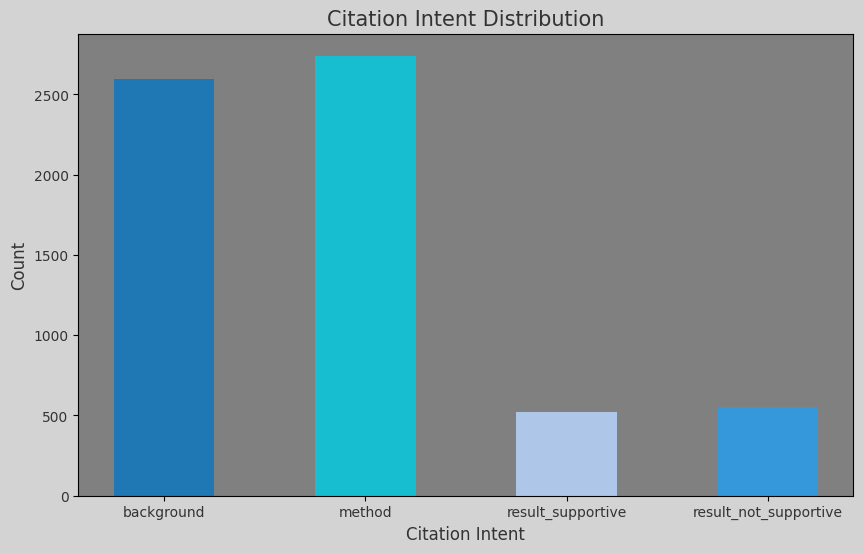

In [100]:
# Citation Intent Distribution Bar Chart - Layout 2
import matplotlib.pyplot as plt

# Data
# Extract labels and counts for plotting
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Colors for each category
colors = ['#1f77b4', '#17becf', '#aec7e8', '#3498db']

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color=colors, width=0.5)

# Set the background color
plt.gca().set_facecolor('grey')
plt.gcf().set_facecolor('lightgrey')

# Adding additional features to the plot
plt.title('Citation Intent Distribution', fontsize=15, color='#333333')
plt.xlabel('Citation Intent', fontsize=12, color='#333333')
plt.ylabel('Count', fontsize=12, color='#333333')
plt.xticks(fontsize=10, color='#333333')
plt.yticks(fontsize=10, color='#333333')

# Show the plot
plt.show()

### Tree Map
The papers are settled with an intent as a paper property. From all intents from citations a paper receives the majority intent is selected and assigned as the paper's "property". The information if the majority intent from all citations a paper receives occurs because more than 50% of all citations the paper receives belong to the particular intent class. 

In [101]:
# Create the data set that includes the paper id and the counts of citations of specific intent per paper id.

import pandas as pd
import networkx as nx

# Initialize a dictionary to hold the counts
paper_property_counts = {}

# Iterate through each node in G
for node in G.nodes():
    # Check the indegree of the node, skip if indegree is 0
    if G.in_degree(node) == 0:
        continue
    
    # If the node is not already in the dictionary, initialize it
    if node not in paper_property_counts:
        paper_property_counts[node] = {'background': 0, 'method': 0, 'result_supportive': 0, 'result_not_supportive': 0}
    
    # Iterate through the incoming edges of the node
    for edge in G.in_edges(node, data=True):
        # Extract the property of the edge
        edge_property = edge[2]['label']
        
        # Update the count for the corresponding property
        if edge_property in paper_property_counts[node]:
            paper_property_counts[node][edge_property] += 1

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame.from_dict(paper_property_counts, orient='index')

# Reset index to have the paper IDs as a separate column
df.reset_index(inplace=True)
df.rename(columns={'index': 'Paper ID'}, inplace=True)

# Display the DataFrame
print(df)

                                      Paper ID  background  method  \
0     894be9b4ea46a5c422e81ef3c241072d4c73fdc0           1       0   
1     b6642e19efb8db5623b3cc4eef1c5822a6151107           1       0   
2     4e6a17fb8d7a3cada601d942e22eb5da6d01adbd           1       0   
3     2cc6ff899bf17666ad35893524a4d61624555ed7           0       0   
4     a5bb0ff1a026944d2a47a155462959af2b8505a8           1       0   
...                                        ...         ...     ...   
6449  04586be5a2f9d342d2705ef626524bffd3ead1b5           1       0   
6450  2138bc4fab4c6d9fbf78b2970be65f6770676da9           0       1   
6451  ae7c65d4d7710bf5f36309faea886648f9a51d4a           0       0   
6452  22e3889f93c19c15b746c1339ce9d7439ccb632e           0       1   
6453  df384ef1a0677857d0118b9852bff69ee3925e06           0       1   

      result_supportive  result_not_supportive  
0                     0                      0  
1                     0                      0  
2           

In [102]:
# Exclude the 'Paper ID' column and apply idxmax to find the category with the highest count
df['Intent'] = df.drop('Paper ID', axis=1).idxmax(axis=1)

# Display the updated DataFrame
print(df)

                                      Paper ID  background  method  \
0     894be9b4ea46a5c422e81ef3c241072d4c73fdc0           1       0   
1     b6642e19efb8db5623b3cc4eef1c5822a6151107           1       0   
2     4e6a17fb8d7a3cada601d942e22eb5da6d01adbd           1       0   
3     2cc6ff899bf17666ad35893524a4d61624555ed7           0       0   
4     a5bb0ff1a026944d2a47a155462959af2b8505a8           1       0   
...                                        ...         ...     ...   
6449  04586be5a2f9d342d2705ef626524bffd3ead1b5           1       0   
6450  2138bc4fab4c6d9fbf78b2970be65f6770676da9           0       1   
6451  ae7c65d4d7710bf5f36309faea886648f9a51d4a           0       0   
6452  22e3889f93c19c15b746c1339ce9d7439ccb632e           0       1   
6453  df384ef1a0677857d0118b9852bff69ee3925e06           0       1   

      result_supportive  result_not_supportive                 Intent  
0                     0                      0             background  
1              

In [103]:
# Create a function that asigns that intent property at a paper.
# In case of the result intent it will assign a subintent tha delcare the supportive or not supportive nature of the intent.
def assign_intent_and_subintent(row):
    # Check the value in the 'Intent' column
    if row['Intent'] in ['background', 'method']:
        # If 'Intent' is 'Background' or 'Method', 'Subintent' is the same as 'Intent'
        row['Subintent'] = row['Intent']
    elif row['Intent'] in ['result_supportive', 'result_not_supportive']:
        # If 'Intent' is 'Result_Supportive' or 'Result_Not_Supportive', 'Intent' is changed to 'Result'
        # and 'Subintent' takes the original 'Intent' value
        row['Subintent'] = row['Intent']
        row['Intent'] = 'result'
       
    return row

# Apply the function to each row
df = df.apply(assign_intent_and_subintent, axis=1)

# Display the updated DataFrame
print(df)

                                      Paper ID  background  method  \
0     894be9b4ea46a5c422e81ef3c241072d4c73fdc0           1       0   
1     b6642e19efb8db5623b3cc4eef1c5822a6151107           1       0   
2     4e6a17fb8d7a3cada601d942e22eb5da6d01adbd           1       0   
3     2cc6ff899bf17666ad35893524a4d61624555ed7           0       0   
4     a5bb0ff1a026944d2a47a155462959af2b8505a8           1       0   
...                                        ...         ...     ...   
6449  04586be5a2f9d342d2705ef626524bffd3ead1b5           1       0   
6450  2138bc4fab4c6d9fbf78b2970be65f6770676da9           0       1   
6451  ae7c65d4d7710bf5f36309faea886648f9a51d4a           0       0   
6452  22e3889f93c19c15b746c1339ce9d7439ccb632e           0       1   
6453  df384ef1a0677857d0118b9852bff69ee3925e06           0       1   

      result_supportive  result_not_supportive      Intent  \
0                     0                      0  background   
1                     0            

In [104]:
# Calculate the total count for each row
df['Total_Count'] = df[['background', 'method', 'result_supportive', 'result_not_supportive']].sum(axis=1)

# Identify the maximum count among the intent categories for each row
df['Max_Count'] = df[['background', 'method', 'result_supportive', 'result_not_supportive']].max(axis=1)

# Calculate the percentage and determine if it's at least 50%, handling division by zero
df['Majority'] = df.apply(lambda row: "Yes" if row['Total_Count'] > 0 and (row['Max_Count'] / row['Total_Count'] * 100) >= 50 else "No", axis=1)

# Optionally, you can drop the 'Total_Count' and 'Max_Count' columns if they were only needed for this calculation
df.drop(['Total_Count', 'Max_Count'], axis=1, inplace=True)

# Display the updated DataFrame
print(df)

                                      Paper ID  background  method  \
0     894be9b4ea46a5c422e81ef3c241072d4c73fdc0           1       0   
1     b6642e19efb8db5623b3cc4eef1c5822a6151107           1       0   
2     4e6a17fb8d7a3cada601d942e22eb5da6d01adbd           1       0   
3     2cc6ff899bf17666ad35893524a4d61624555ed7           0       0   
4     a5bb0ff1a026944d2a47a155462959af2b8505a8           1       0   
...                                        ...         ...     ...   
6449  04586be5a2f9d342d2705ef626524bffd3ead1b5           1       0   
6450  2138bc4fab4c6d9fbf78b2970be65f6770676da9           0       1   
6451  ae7c65d4d7710bf5f36309faea886648f9a51d4a           0       0   
6452  22e3889f93c19c15b746c1339ce9d7439ccb632e           0       1   
6453  df384ef1a0677857d0118b9852bff69ee3925e06           0       1   

      result_supportive  result_not_supportive      Intent  \
0                     0                      0  background   
1                     0            

In [105]:
# Drop the specified columns from the DataFrame
df = df.drop(['background', 'method', 'result_supportive', 'result_not_supportive'], axis=1)

# Display the updated DataFrame
print(df)

                                      Paper ID      Intent  \
0     894be9b4ea46a5c422e81ef3c241072d4c73fdc0  background   
1     b6642e19efb8db5623b3cc4eef1c5822a6151107  background   
2     4e6a17fb8d7a3cada601d942e22eb5da6d01adbd  background   
3     2cc6ff899bf17666ad35893524a4d61624555ed7      result   
4     a5bb0ff1a026944d2a47a155462959af2b8505a8  background   
...                                        ...         ...   
6449  04586be5a2f9d342d2705ef626524bffd3ead1b5  background   
6450  2138bc4fab4c6d9fbf78b2970be65f6770676da9      method   
6451  ae7c65d4d7710bf5f36309faea886648f9a51d4a      result   
6452  22e3889f93c19c15b746c1339ce9d7439ccb632e      method   
6453  df384ef1a0677857d0118b9852bff69ee3925e06      method   

                  Subintent Majority  
0                background      Yes  
1                background      Yes  
2                background      Yes  
3         result_supportive      Yes  
4                background      Yes  
...                  

Creating the treemap

In [106]:
import pandas as pd

# Group by Category, Subcategory, and Majority and count the number of papers
grouped_df = df.groupby(['Intent', 'Subintent', 'Majority']).size().reset_index(name='Count')

print(grouped_df)

       Intent              Subintent Majority  Count
0  background             background       No    258
1  background             background      Yes   2580
2      method                 method      Yes   2682
3      result  result_not_supportive      Yes    456
4      result      result_supportive      Yes    478


In [107]:
# Insta;; the squarify library that ebables the making of a tree map.
pip install squarify

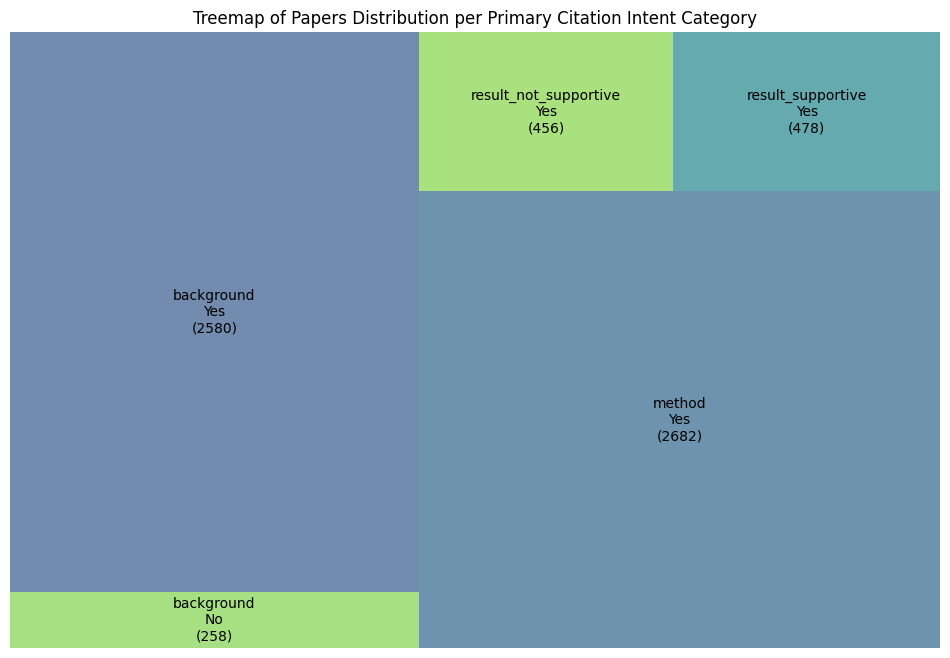

In [108]:
# Create the treemap.
import matplotlib.pyplot as plt
import squarify

# Prepare data for the treemap
sizes = grouped_df['Count'].values
labels = grouped_df.apply(lambda x: f"{x['Subintent']}\n{x['Majority']}\n({x['Count']})", axis=1)

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.7)
plt.axis('off')
plt.title('Treemap of Papers Distribution per Primary Citation Intent Category')
plt.show()

---

## Reasearch Performance Indicators calculations
1. Citation Count (Indegree)
2. Page Rank
3. Citation Count on weighted graph based on the citation intent with weight system 1.
4. Citation Count on weighted graph based on the citation intent with weight system 2.
5. Citation Count on filtered network without result not supportive citations
6. Citation Count on filtered network without result not supportive and background citations
7. Page Rank based on filtered network without result not supportive citations
8. Page Rank based on filtered network without result not supportive and background citations

### Citation Count (In Degree)

In [109]:
# Calculate the citation count/indegree
# import the necessary libraries
import csv
import networkx as nx

# Assuming 'G' is your directed graph

# Prepare data for CSV
data_for_csv = [("Paper_ID", "Citation_Count")]
data_for_csv.extend([(node, G.in_degree(node)) for node in G])

# Path to your output CSV file
csv_file_path = 'citation_counts.csv'

# Write data to CSV
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data_for_csv)

print(f"Citation counts have been written to {csv_file_path}")

Citation counts have been written to citation_counts.csv


In [110]:
# Calculate the top k papers with the higher indegree.
# Path to your CSV file
csv_file_path = 'citation_counts.csv'

# Read data from the CSV file
with open(csv_file_path, 'r') as csvfile:
    reader = csv.reader(csvfile)
    # Skip the header
    next(reader, None)
    # Read the rest of the rows, convert citation counts to integers, and filter out 'None' Paper IDs
    data = [(row[0], int(row[1])) for row in reader if row[0] != 'None']

# Sort the data based on citation counts in descending order
sorted_data = sorted(data, key=lambda x: x[1], reverse=True)

# Get the top k papers with the highest citation counts
top_100_papers_CC = sorted_data[:100]
top_200_papers_CC = sorted_data[:200]
top_300_papers_CC = sorted_data[:300]



---
---

### Page Rank

In [111]:
# Calculate the page rank of the papers
# Assuming 'G' is your directed graph
pagerank_scores = nx.pagerank(G, alpha=0.5)

# Step 1: Write the PageRank results to a CSV file, excluding 'None' Paper ID
csv_file_path = 'pagerank_scores.csv'
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Paper ID', 'PageRank Score'])  # Write the header
    for paper_id, score in pagerank_scores.items():
        if paper_id != 'None':  # Exclude 'None' Paper ID
            writer.writerow([paper_id, score])  # Write the paper ID and PageRank score


In [112]:
# Calculate the top k list of papers with the highest page rank scores.
# Step 2: Read the CSV, sort by PageRank score, and find the top five papers excluding 'None'
with open(csv_file_path, 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip the header row
    # Read and convert scores to float, excluding 'None' Paper ID
    data = [(row[0], float(row[1])) for row in reader if row[0] != 'None']

# Sort the data based on PageRank scores in descending order
sorted_data = sorted(data, key=lambda x: x[1], reverse=True)

# Get the top five papers with the highest PageRank scores
top_100_papers_PR = sorted_data[:100]
top_200_papers_PR = sorted_data[:200]
top_300_papers_PR = sorted_data[:300]



---
---

### Citation Count: Citation Count on weighted graph based on the citation intent (Weight system 1)
Based on the property of each edge a specific weight is assigned so as to express the priority of the citation as a citation that has the intention to clarify the value extracted from the cited paper. 

-- Background Citations: weight = 0

-- Method Citations: weight = 1.3

-- Result Supportive Citations: weight = 2

-- Result Not Supportive Citations: weight = -1

In [113]:
# Import the necessary libraries
import copy

# Create a shallow copy of the graph G
G_CC_1 = G.copy()

# Assuming G_CC_1 is your MultiDiGraph and you want to convert it to DiGraph
G_CC_1_DiGraph = nx.DiGraph(G_CC_1)

In [114]:
# Now, iterate through each edge in the copy and update weights based on the 'label' property
for u, v, data in G_CC_1_DiGraph.edges(data=True):
    label = data['label']
    
    if label == 'background':
        weight = 0
    elif label == 'result_not_supportive':
        weight = -1
    elif label == 'method':
        weight = 1.3
    elif label == 'result_supportive':
        weight = 2
    else:
        weight = 0  # Default weight for any unspecified labels
    
    # Update the edge in the copy with the new weight
    G_CC_1_DiGraph[u][v]['weight'] = weight

# G_CC_1_DiGraph now contains the modified weights, while G remains unchanged.

In [115]:
import csv
import networkx as nx

# Assuming 'G_CC_1_DiGraph' is your weighted directed graph

# Prepare data for CSV, including the header
data_for_csv = [("Paper_ID", "Weighted_Citation_Count")]
# Use in_degree with weight='weight' to calculate weighted indegree
data_for_csv.extend([(node, G_CC_1_DiGraph.in_degree(node, weight='weight')) for node in G_CC_1_DiGraph])

# Path to your output CSV file
csv_file_path = 'weighted_citation_counts_1.csv'

# Write data to CSV
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data_for_csv)

print(f"Weighted citation counts for case 1 have been written to {csv_file_path}")

Weighted citation counts for case 1 have been written to weighted_citation_counts_1.csv


In [116]:
# Calculate the k  top papers with the highest weighted citation count under weight system 1.
import csv

# Path to your CSV file
csv_file_path = 'weighted_citation_counts_1.csv'

# Read data from the CSV file
with open(csv_file_path, 'r') as csvfile:
    reader = csv.reader(csvfile)
    # Skip the header
    next(reader, None)
    # Read the rest of the rows, convert citation counts to floats, and filter out 'None' Paper IDs
    data = [(row[0], float(row[1])) for row in reader if row[0] != 'None']

# Sort the data based on citation counts in descending order
sorted_data = sorted(data, key=lambda x: x[1], reverse=True)

# Get the top five papers with the highest citation counts
top_100_papers_CC_W1 = sorted_data[:100]
top_200_papers_CC_W1 = sorted_data[:200]
top_300_papers_CC_W1 = sorted_data[:300]


---
---

### Citation Count: Citation Count on weighted graph based on the citation intent (Weight system 2)
Based on the property of each edge a specific weight is assigned so as to express the priority of the citation as a citation that has the intention to clarify the value extracted from the cited paper.

-- Background Citations: weight = 0.8

-- Method Citations: weight = 1

-- Result Supportive Citations: weight = 1.5

-- Result Not Supportive Citations: weight = 0.5

In [117]:
# Import the necessary libraries
import copy

# Create a shallow copy of the graph G
G_CC_2 = G.copy()

# Assuming G_CC_1 is your MultiDiGraph and you want to convert it to DiGraph
G_CC_2_DiGraph = nx.DiGraph(G_CC_2)

In [118]:
# Now, iterate through each edge in the copy and update weights based on the 'label' property
for u, v, data in G_CC_2_DiGraph.edges(data=True):
    label = data['label']
    
    if label == 'background':
        weight = 0.8
    elif label == 'result_not_supportive':
        weight = 0.5
    elif label == 'method':
        weight = 1
    elif label == 'result_supportive':
        weight = 1.5
    else:
        weight = 0  # Default weight for any unspecified labels
    
    # Update the edge in the copy with the new weight
    G_CC_2_DiGraph[u][v]['weight'] = weight

# G_CC_DiGraph now contains the modified weights, while G remains unchanged.

In [119]:
import csv
import networkx as nx

# Assuming 'G_CC_2_DiGraph' is your weighted directed graph

# Prepare data for CSV, including the header
data_for_csv = [("Paper_ID", "Weighted_Citation_Count")]
# Use in_degree with weight='weight' to calculate weighted indegree
data_for_csv.extend([(node, G_CC_2_DiGraph.in_degree(node, weight='weight')) for node in G_CC_2_DiGraph])

# Path to your output CSV file
csv_file_path = 'weighted_citation_counts_2.csv'

# Write data to CSV
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data_for_csv)

print(f"Weighted citation counts 2 for case 1 have been written to {csv_file_path}")

Weighted citation counts 2 for case 1 have been written to weighted_citation_counts_2.csv


In [120]:
# Calculate the k-top papers with the highest weighted citation count udenr weight system 2.
import csv

# Path to your CSV file
csv_file_path = 'weighted_citation_counts_2.csv'

# Read data from the CSV file
with open(csv_file_path, 'r') as csvfile:
    reader = csv.reader(csvfile)
    # Skip the header
    next(reader, None)
    # Read the rest of the rows, convert citation counts to floats, and filter out 'None' Paper IDs
    data = [(row[0], float(row[1])) for row in reader if row[0] != 'None']

# Sort the data based on citation counts in descending order
sorted_data = sorted(data, key=lambda x: x[1], reverse=True)

# Get the top five papers with the highest citation counts
top_100_papers_CC_W2 = sorted_data[:100]
top_200_papers_CC_W2 = sorted_data[:200]
top_300_papers_CC_W2 = sorted_data[:300]



---
---

### Citation Count: Citation Count on filtered network without result not supportive citations 
Based on the property of each edge, the edges with property result not supported are excluded from the graph. 

In [121]:
# Assuming 'G' is your MultiGraph or MultiDiGraph
G_filtered1 = G.copy()

# List to hold edges to be removed
edges_to_remove = []

for u, v, key, data in G_filtered1.edges(keys=True, data=True):
    if data.get('label') == 'result_not_supportive':
        # Add the edge to the removal list
        edges_to_remove.append((u, v, key))

# Remove the specified edges
for edge in edges_to_remove:
    u, v, key = edge
    G_filtered1.remove_edge(u, v, key)

# Now, G_filtered1 has not all 'result_not_supportive' edges removed

In [122]:
# Calculate the citation count/indegree
# import the necessary libraries
import csv
import networkx as nx

# Assuming 'G_filtered1' is your directed graph

# Prepare data for CSV
data_for_csv = [("Paper_ID", "Filtered_Citation_Count")]
data_for_csv.extend([(node, G_filtered1.in_degree(node)) for node in G_filtered1])

# Path to your output CSV file
csv_file_path = 'filtered1_citation_counts.csv'

# Write data to CSV
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data_for_csv)

print(f"Filtered Citation counts have been written to {csv_file_path}")

Filtered Citation counts have been written to filtered1_citation_counts.csv


In [123]:
# Calculate the top k papers with the higher indegree.
# Path to your CSV file
csv_file_path = 'filtered1_citation_counts.csv'

# Read data from the CSV file
with open(csv_file_path, 'r') as csvfile:
    reader = csv.reader(csvfile)
    # Skip the header
    next(reader, None)
    # Read the rest of the rows, convert citation counts to integers, and filter out 'None' Paper IDs
    data = [(row[0], int(row[1])) for row in reader if row[0] != 'None']

# Sort the data based on citation counts in descending order
sorted_data = sorted(data, key=lambda x: x[1], reverse=True)

# Get the top k papers with the highest citation counts
top_100_papers_CC_FL1 = sorted_data[:100]
top_200_papers_CC_FL1 = sorted_data[:200]
top_300_papers_CC_FL1 = sorted_data[:300]



---
---

### Citation Count: Citation Count on filtered network without result not supportive citations and without background.
Based on the property of each edge the edges with property result not supported and background are excluded from the graph. 

In [124]:
# Assuming 'G' is your MultiGraph or MultiDiGraph
G_filtered2 = G.copy()

# List to hold edges to be removed
edges_to_remove = []

for u, v, key, data in G_filtered1.edges(keys=True, data=True):
    if data.get('label') == 'result_not_supportive' and data.get('label') == 'background':
        # Add the edge to the removal list
        edges_to_remove.append((u, v, key))

# Remove the specified edges
for edge in edges_to_remove:
    u, v, key = edge
    G_filtered2.remove_edge(u, v, key)

# Now, G_filtered2 has all 'result_not_supportive' & 'background' edges removed

In [125]:
# Calculate the citation count/indegree
# import the necessary libraries
import csv
import networkx as nx

# Assuming 'G_filtered2' is your directed graph

# Prepare data for CSV
data_for_csv = [("Paper_ID", "Filtered_Citation_Count")]
data_for_csv.extend([(node, G_filtered2.in_degree(node)) for node in G_filtered2])

# Path to your output CSV file
csv_file_path = 'filtered2_citation_counts.csv'

# Write data to CSV
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data_for_csv)

print(f"Filtered 2 Citation counts have been written to {csv_file_path}")

Filtered 2 Citation counts have been written to filtered2_citation_counts.csv


In [126]:
# Calculate the top k papers with the higher indegree.
# Path to your CSV file
csv_file_path = 'filtered2_citation_counts.csv'

# Read data from the CSV file
with open(csv_file_path, 'r') as csvfile:
    reader = csv.reader(csvfile)
    # Skip the header
    next(reader, None)
    # Read the rest of the rows, convert citation counts to integers, and filter out 'None' Paper IDs
    data = [(row[0], int(row[1])) for row in reader if row[0] != 'None']

# Sort the data based on citation counts in descending order
sorted_data = sorted(data, key=lambda x: x[1], reverse=True)

# Get the top k papers with the highest citation counts
top_100_papers_CC_FL2 = sorted_data[:100]
top_200_papers_CC_FL2 = sorted_data[:200]
top_300_papers_CC_FL2 = sorted_data[:300]



---
---

### Page Rank filtered versions.


### Filter 1: without result not supportive

In [127]:
# Calculate the page rank of the papers
# Assuming 'G' is your directed graph
pagerank_scores2 = nx.pagerank(G_filtered1, alpha = 0.5)

# Step 1: Write the PageRank results to a CSV file, excluding 'None' Paper ID
csv_file_path = 'pagerank_scores2.csv'
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Paper ID', 'PageRank Score'])  # Write the header
    for paper_id, score in pagerank_scores2.items():
        if paper_id != 'None':  # Exclude 'None' Paper ID
            writer.writerow([paper_id, score])  # Write the paper ID and PageRank score

In [ ]:
# Calculate the top k list of papers with the highest page rank scores.
# Step 2: Read the CSV, sort by PageRank score, and find the top five papers excluding 'None'
with open(csv_file_path, 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip the header row
    # Read and convert scores to float, excluding 'None' Paper ID
    data = [(row[0], float(row[1])) for row in reader if row[0] != 'None']

# Sort the data based on PageRank scores in descending order
sorted_data = sorted(data, key=lambda x: x[1], reverse=True)

# Get the top five papers with the highest PageRank scores
top_100_papers_PR_FL1 = sorted_data[:100]
top_200_papers_PR_FL1 = sorted_data[:200]
top_300_papers_PR_FL1 = sorted_data[:300]


### Filter 2: without result not supportive and without background

In [129]:
# Calculate the page rank of the papers
# Assuming 'G' is your directed graph
pagerank_scores3 = nx.pagerank(G_filtered2, alpha = 0.5)

# Step 1: Write the PageRank results to a CSV file, excluding 'None' Paper ID
csv_file_path = 'pagerank_scores3.csv'
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Paper ID', 'PageRank Score'])  # Write the header
    for paper_id, score in pagerank_scores3.items():
        if paper_id != 'None':  # Exclude 'None' Paper ID
            writer.writerow([paper_id, score])  # Write the paper ID and PageRank score

In [130]:
# Calculate the top five list of papers with the highest page rank scores.
# Step 2: Read the CSV, sort by PageRank score, and find the top five papers excluding 'None'
with open(csv_file_path, 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip the header row
    # Read and convert scores to float, excluding 'None' Paper ID
    data = [(row[0], float(row[1])) for row in reader if row[0] != 'None']

# Sort the data based on PageRank scores in descending order
sorted_data = sorted(data, key=lambda x: x[1], reverse=True)

# Get the top five papers with the highest PageRank scores
top_100_papers_PR_FL2 = sorted_data[:100]
top_200_papers_PR_FL2 = sorted_data[:200]
top_300_papers_PR_FL2 = sorted_data[:300]


---
---

## Similarity-Comparison Metrics





### Jaccard Similarity 
Compare the jaccard simmilarity for the top 100, 200, 300 papers'set formed based on each different version of RPI.


In [131]:
# Initialize the dictionary with specified keys and empty lists for values
sim_metrics_dct = {
    "CC_W1": {"jaccard": [], "spearman": []},
    "CC_W2": {"jaccard": [], "spearman": []},
    "CC_FL1": {"jaccard": [], "spearman": []},
    "CC_FL2": {"jaccard": [], "spearman": []},
    "PR_FL1": {"jaccard": [], "spearman": []},
    "PR_FL2": {"jaccard": [], "spearman": []}
}


In [132]:
# Group metrics
group1 =100
group2 = 200
group3 = 300

In [133]:
# Calculate Jaccard Similarity index.
# Define the function that will take two sets as input and it will return the Jaccards Simlarity Index for these two sets.

def jaccard_similarity(list1, list2):
    # Extract just the IDs (first element of each tuple) to form sets
    set1 = set([id for id, _ in list1])
    set2 = set([id for id, _ in list2])
    
    # Find the intersection of the two sets
    intersection = set1.intersection(set2)
    
    # Find the union of the two sets
    union = set1.union(set2)
    
    # Calculate the Jaccard Similarity
    similarity = len(intersection) / len(union)
    
    return similarity

### Top 100 papers.

#### Comparisons between CC and CC in the three different senarios that take into consideration the citation intent.

In [134]:
## For the 100 papers
# Comparison 1: Citation Count with Weighted Citation Count - weights combination 1.
similarity_cc_1 = jaccard_similarity(top_100_papers_CC, top_100_papers_CC_W1)
print(f"Jaccard Similarity between initial citation count and citation count upon weight system 1: {similarity_cc_1}")

# Comparison 2: Citation Count with Weighted Citation Count - weights combination 2.
similarity_cc_2 = jaccard_similarity(top_100_papers_CC, top_100_papers_CC_W2)
print(f"Jaccard Similarity between initial citation count and citation count upon weight system 2: {similarity_cc_2}")

# Comparison 3: Citation Count with Citation Count on filtered network 1 (without result not supportive citations).
similarity_cc_3 = jaccard_similarity(top_100_papers_CC, top_100_papers_CC_FL1)
print(f"Jaccard Similarity between initial citation count and citation count upon filtered network without result not supportive citations: {similarity_cc_3}")

# Comparison 3: Citation Count with Citation Count on filtered network 1 (without result not supportive citations).
similarity_cc_4 = jaccard_similarity(top_100_papers_CC, top_100_papers_CC_FL2)
print(f"Jaccard Similarity between initial citation count and citation count upon filtered network without result not supportive and background citations: {similarity_cc_4}")

Jaccard Similarity between initial citation count and citation count upon weight system 1: 0.27388535031847133
Jaccard Similarity between initial citation count and citation count upon weight system 2: 0.3698630136986301
Jaccard Similarity between initial citation count and citation count upon filtered network without result not supportive citations: 0.9230769230769231
Jaccard Similarity between initial citation count and citation count upon filtered network without result not supportive and background citations: 1.0


In [135]:
# Update the results dictionary.
sim_metrics_dct["CC_W1"]["jaccard"].append((group1, similarity_cc_1))
sim_metrics_dct["CC_W2"]["jaccard"].append((group1, similarity_cc_2))
sim_metrics_dct["CC_FL1"]["jaccard"].append((group1, similarity_cc_3))
sim_metrics_dct["CC_FL2"]["jaccard"].append((group1, similarity_cc_4))

#### Comparisons between PR in the initial network and the filtered networks.

In [136]:
# Comparison 5: Page Rank in the initial network with page rank in the filtered network.
similarity_cc_5 = jaccard_similarity(top_100_papers_PR, top_100_papers_PR_FL1)
print(f"Jaccard Similarity between page rank calculated upon initial network and upon filtered network without the result not supportive citations: {similarity_cc_5}")


# Comparison 6: Page Rank in the initial network with page rank in the filtered network.
similarity_cc_6 = jaccard_similarity(top_100_papers_PR, top_100_papers_PR_FL2)
print(f"Jaccard Similarity between page rank calculated upon initial network and upon filtered network without the result not supportive and background citations: {similarity_cc_6}")


Jaccard Similarity between page rank calculated upon initial network and upon filtered network without the result not supportive citations: 0.9230769230769231
Jaccard Similarity between page rank calculated upon initial network and upon filtered network without the result not supportive and background citations: 1.0


In [137]:
# Update the results dictionary.
sim_metrics_dct["PR_FL1"]["jaccard"].append((group1, similarity_cc_5))
sim_metrics_dct["PR_FL2"]["jaccard"].append((group1, similarity_cc_6))


### Top 200 papers.

#### Comparisons between CC and CC in the different senarios that take into consideration the citation intent.

In [138]:
## For the 200 papers
# Comparison 7: Citation Count with Weighted Citation Count - weights combination 1.
similarity_cc_7 = jaccard_similarity(top_200_papers_CC, top_200_papers_CC_W1)
print(f"Jaccard Similarity between initial citation count and citation count upon weight system 1: {similarity_cc_7}")

# Comparison 8: Citation Count with Weighted Citation Count - weights combination 2.
similarity_cc_8 = jaccard_similarity(top_200_papers_CC, top_200_papers_CC_W2)
print(f"Jaccard Similarity between initial citation count and citation count upon weight system 2: {similarity_cc_8}")

# Comparison 9: Citation Count with Citation Count on filtered network 1 (without result not supportive citations).
similarity_cc_9 = jaccard_similarity(top_200_papers_CC, top_200_papers_CC_FL1)
print(f"Jaccard Similarity between initial citation count and citation count upon filtered network without result not supportive citations: {similarity_cc_9}")

# Comparison 10: Citation Count with Citation Count on filtered network 1 (without result not supportive citations).
similarity_cc_10 = jaccard_similarity(top_200_papers_CC, top_200_papers_CC_FL2)
print(f"Jaccard Similarity between initial citation count and citation count upon filtered network without result not supportive and background citations: {similarity_cc_10}")

Jaccard Similarity between initial citation count and citation count upon weight system 1: 0.14285714285714285
Jaccard Similarity between initial citation count and citation count upon weight system 2: 0.17994100294985252
Jaccard Similarity between initial citation count and citation count upon filtered network without result not supportive citations: 0.8957345971563981
Jaccard Similarity between initial citation count and citation count upon filtered network without result not supportive and background citations: 1.0


In [139]:
# Update the results dictionary.
sim_metrics_dct["CC_W1"]["jaccard"].append((group2, similarity_cc_7))
sim_metrics_dct["CC_W2"]["jaccard"].append((group2, similarity_cc_8))
sim_metrics_dct["CC_FL1"]["jaccard"].append((group2, similarity_cc_9))
sim_metrics_dct["CC_FL2"]["jaccard"].append((group2, similarity_cc_10))

#### Comparisons between PR in the initial network and the filtered networks.¶

In [140]:
# Comparison 11: Page Rank in the initial network with page rank in the filtered network.
similarity_cc_11 = jaccard_similarity(top_200_papers_PR, top_200_papers_PR_FL1)
print(f"Jaccard Similarity between page rank calculated upon initial network and upon filtered network without the result not supportive citations: {similarity_cc_11}")


# Comparison 12: Page Rank in the initial network with page rank in the filtered network.
similarity_cc_12 = jaccard_similarity(top_200_papers_PR, top_200_papers_PR_FL2)
print(f"Jaccard Similarity between page rank calculated upon initial network and upon filtered network without the result not supportive and background citations: {similarity_cc_12}")

Jaccard Similarity between page rank calculated upon initial network and upon filtered network without the result not supportive citations: 0.8957345971563981
Jaccard Similarity between page rank calculated upon initial network and upon filtered network without the result not supportive and background citations: 1.0


In [141]:
# Update the results dictionary.
sim_metrics_dct["PR_FL1"]["jaccard"].append((group2, similarity_cc_11))
sim_metrics_dct["PR_FL2"]["jaccard"].append((group2, similarity_cc_12))

#### Top 300 papers.

Comparisons between CC and CC in the different senarios that take into consideration the citation intent.

In [142]:
## For the 300 papers
# Comparison 13: Citation Count with Weighted Citation Count - weights combination 1.
similarity_cc_13 = jaccard_similarity(top_300_papers_CC, top_300_papers_CC_W1)
print(f"Jaccard Similarity between initial citation count and citation count upon weight system 1: {similarity_cc_13}")

# Comparison 14: Citation Count with Weighted Citation Count - weights combination 2.
similarity_cc_14 = jaccard_similarity(top_300_papers_CC, top_300_papers_CC_W2)
print(f"Jaccard Similarity between initial citation count and citation count upon weight system 2: {similarity_cc_14}")

# Comparison 15: Citation Count with Citation Count on filtered network 1 (without result not supportive citations).
similarity_cc_15 = jaccard_similarity(top_300_papers_CC, top_300_papers_CC_FL1)
print(f"Jaccard Similarity between initial citation count and citation count upon filtered network without result not supportive citations: {similarity_cc_15}")

# Comparison 16: Citation Count with Citation Count on filtered network 1 (without result not supportive citations).
similarity_cc_16 = jaccard_similarity(top_300_papers_CC, top_300_papers_CC_FL2)
print(f"Jaccard Similarity between initial citation count and citation count upon filtered network without result not supportive and background citations: {similarity_cc_16}")

Jaccard Similarity between initial citation count and citation count upon weight system 1: 0.11524163568773234
Jaccard Similarity between initial citation count and citation count upon weight system 2: 0.14068441064638784
Jaccard Similarity between initial citation count and citation count upon filtered network without result not supportive citations: 0.8987341772151899
Jaccard Similarity between initial citation count and citation count upon filtered network without result not supportive and background citations: 1.0


In [143]:
# Update the results dictionary.
sim_metrics_dct["CC_W1"]["jaccard"].append((group3, similarity_cc_13))
sim_metrics_dct["CC_W2"]["jaccard"].append((group3, similarity_cc_14))
sim_metrics_dct["CC_FL1"]["jaccard"].append((group3, similarity_cc_15))
sim_metrics_dct["CC_FL2"]["jaccard"].append((group3, similarity_cc_16))

Comparisons between PR in the initial network and the filtered networks.¶

In [144]:
# Comparison 17: Page Rank in the initial network with page rank in the filtered network.
similarity_cc_17 = jaccard_similarity(top_300_papers_PR, top_300_papers_PR_FL1)
print(f"Jaccard Similarity between page rank calculated upon initial network and upon filtered network without the result not supportive citations: {similarity_cc_17}")


# Comparison 18: Page Rank in the initial network with page rank in the filtered network.
similarity_cc_18 = jaccard_similarity(top_300_papers_PR, top_300_papers_PR_FL2)
print(f"Jaccard Similarity between page rank calculated upon initial network and upon filtered network without the result not supportive and background citations: {similarity_cc_18}")

Jaccard Similarity between page rank calculated upon initial network and upon filtered network without the result not supportive citations: 0.8987341772151899
Jaccard Similarity between page rank calculated upon initial network and upon filtered network without the result not supportive and background citations: 1.0


In [145]:
# Update the results dictionary.
sim_metrics_dct["PR_FL1"]["jaccard"].append((group3, similarity_cc_17))
sim_metrics_dct["PR_FL2"]["jaccard"].append((group3, similarity_cc_18))

### Spearmans rho rank correlation coefficient
Compare the Spearmans rho rank correlation coefficient for the top 100, 200, 300 papers'set formed based on each different version of RPI.

### Top 100 Papers.

In [146]:
# Create the data set with the top 100 papers from each RPI.
# Create dataframes with the top 100 papers based on the Citation Counts.
df_CC = pd.DataFrame(top_100_papers_CC, columns=['Paper ID', 'RPI']) 

df_CC_W1 = pd.DataFrame(top_100_papers_CC_W1, columns=['Paper ID', 'RPI'])

df_CC_W2 = pd.DataFrame(top_100_papers_CC_W2, columns=['Paper ID', 'RPI'])

df_CC_FL1 = pd.DataFrame(top_100_papers_CC_FL1, columns=['Paper ID', 'RPI'])

df_CC_FL2 = pd.DataFrame(top_100_papers_CC_FL2, columns=['Paper ID', 'RPI'])

# Create dataframes with the top 100 papers based on Page Rank.
df_PR = pd.DataFrame(top_100_papers_PR, columns=['Paper ID', 'RPI'])

df_PR_FL1 = pd.DataFrame(top_100_papers_PR_FL1, columns=['Paper ID', 'RPI'])

df_PR_FL2 = pd.DataFrame(top_100_papers_PR_FL2, columns=['Paper ID', 'RPI'])


In [147]:
# Rename the RPI column so as to indicate the specific version of the RPI in each group of k-top papers list based on an RPI.
df_CC.rename(columns={'RPI': 'RPI_CC'}, inplace=True)
df_CC_W1.rename(columns={'RPI': 'RPI_CC_W1'}, inplace=True)
df_CC_W2.rename(columns={'RPI': 'RPI_CC_W2'}, inplace=True)
df_CC_FL1.rename(columns={'RPI': 'RPI_CC_FL1'}, inplace=True)
df_CC_FL2.rename(columns={'RPI': 'RPI_CC_FL2'}, inplace=True)

df_PR.rename(columns={'RPI': 'RPI_PR'}, inplace=True)
df_PR_FL1.rename(columns={'RPI': 'RPI_PR_FL1'}, inplace=True)
df_PR_FL2.rename(columns={'RPI': 'RPI_PR_FL2'}, inplace=True)

In [148]:
# Merge the data sets that we need to compare.
df_comp1 = pd.merge(df_CC, df_CC_W1, on='Paper ID', how='inner')
df_comp2 = pd.merge(df_CC, df_CC_W2, on='Paper ID', how='inner')
df_comp3 = pd.merge(df_CC, df_CC_FL1, on='Paper ID', how='inner')
df_comp4 = pd.merge(df_CC, df_CC_FL2, on='Paper ID', how='inner')

df_comp5 = pd.merge(df_PR, df_PR_FL1, on= 'Paper ID', how= 'inner')
df_comp6 = pd.merge(df_PR, df_PR_FL2, on= 'Paper ID', how= 'inner')

In [149]:
from scipy.stats import spearmanr


# Assuming df_comp1 is your DataFrame and it has columns 'RPI_CC' and 'RPI_CC_W1'

# Calculate Spearman's rank correlation
rho1, p_value1 = spearmanr(df_comp1['RPI_CC'], df_comp1['RPI_CC_W1'])
print("Comparison between the citation count and the weighted citation count under the system 1.")
print(f"Spearman's rho: {rho}")
print(f"P-value: {p_value}")
print('---')

# Assuming df_comp2 is your DataFrame and it has columns 'RPI_CC' and 'RPI_CC_W2'

# Calculate Spearman's rank correlation
rho2, p_value2 = spearmanr(df_comp2['RPI_CC'], df_comp2['RPI_CC_W2'])
print("Comparison between the citation count and the weighted citation count under the system 2.")
print(f"Spearman's rho: {rho}")
print(f"P-value: {p_value}")
print('---')

# Assuming df_comp3 is your DataFrame and it has columns 'RPI_CC' and 'RPI_CC_FL1'

# Calculate Spearman's rank correlation
rho3, p_value3 = spearmanr(df_comp3['RPI_CC'], df_comp3['RPI_CC_FL1'])
print("Comparison between the citation count and the filtered citation count from the citation network without the result not supportive.")
print(f"Spearman's rho: {rho}")
print(f"P-value: {p_value}")
print('---')

# Assuming df_comp4 is your DataFrame and it has columns 'RPI_CC' and 'RPI_CC_FL2'

# Calculate Spearman's rank correlation
rho4, p_value4 = spearmanr(df_comp4['RPI_CC'], df_comp4['RPI_CC_FL2'])
print("Comparison between the citation count and the filtered citation count from the citation network without the result not supportive & background.")
print(f"Spearman's rho: {rho}")
print(f"P-value: {p_value}")
print('---')

Comparison between the citation count and the weighted citation count under the system 1.
Spearman's rho: 1.0
P-value: 0.0
---
Comparison between the citation count and the weighted citation count under the system 2.
Spearman's rho: 1.0
P-value: 0.0
---
Comparison between the citation count and the filtered citation count from the citation network without the result not supportive.
Spearman's rho: 1.0
P-value: 0.0
---
Comparison between the citation count and the filtered citation count from the citation network without the result not supportive & background.
Spearman's rho: 1.0
P-value: 0.0
---


In [150]:
# Update the results dictionary.
sim_metrics_dct["CC_W1"]["spearman"].append((group1, rho1))
sim_metrics_dct["CC_W2"]["spearman"].append((group1, rho2))
sim_metrics_dct["CC_FL1"]["spearman"].append((group1, rho3))
sim_metrics_dct["CC_FL2"]["spearman"].append((group1, rho4))

In [151]:
# Assuming df_comp4 is your DataFrame and it has columns 'RPI_PR' and 'RPI_PR_FL1'

# Calculate Spearman's rank correlation
rho5, p_value5 = spearmanr(df_comp5['RPI_PR'], df_comp5['RPI_PR_FL1'])
print("Comparison between the page rank and the filtered page rank from the citation network without the result not supportive.")
print(f"Spearman's rho: {rho}")
print(f"P-value: {p_value}")
print('---')

# Assuming df_comp4 is your DataFrame and it has columns 'RPI_PR' and 'RPI_PR_FL2'

# Calculate Spearman's rank correlation
rho6, p_value6 = spearmanr(df_comp6['RPI_PR'], df_comp6['RPI_PR_FL2'])
print("Comparison between the page rank and the filtered page rank from the citation network without the result not supportive & background.")
print(f"Spearman's rho: {rho}")
print(f"P-value: {p_value}")
print('---')

Comparison between the page rank and the filtered page rank from the citation network without the result not supportive.
Spearman's rho: 1.0
P-value: 0.0
---
Comparison between the page rank and the filtered page rank from the citation network without the result not supportive & background.
Spearman's rho: 1.0
P-value: 0.0
---


In [152]:
# Update the results dictionary.
sim_metrics_dct["PR_FL1"]["spearman"].append((group1, rho5))
sim_metrics_dct["PR_FL2"]["spearman"].append((group1, rho6))

#### Top 200 Papers

In [153]:
# Create dataframes with the top 200 papers based on the Citation Counts.
df_CC = pd.DataFrame(top_200_papers_CC, columns=['Paper ID', 'RPI']) 

df_CC_W1 = pd.DataFrame(top_200_papers_CC_W1, columns=['Paper ID', 'RPI'])

df_CC_W2 = pd.DataFrame(top_200_papers_CC_W2, columns=['Paper ID', 'RPI'])

df_CC_FL1 = pd.DataFrame(top_200_papers_CC_FL1, columns=['Paper ID', 'RPI'])

df_CC_FL2 = pd.DataFrame(top_200_papers_CC_FL2, columns=['Paper ID', 'RPI'])

# Create dataframes with the top 100 papers based on Page Rank.
df_PR = pd.DataFrame(top_200_papers_PR, columns=['Paper ID', 'RPI'])

df_PR_FL1 = pd.DataFrame(top_200_papers_PR_FL1, columns=['Paper ID', 'RPI'])

df_PR_FL2 = pd.DataFrame(top_200_papers_PR_FL2, columns=['Paper ID', 'RPI'])


In [154]:
# Rename the RPI column so as to indicate the specific version of the RPI in each group of k-top papers list based on an RPI.
df_CC.rename(columns={'RPI': 'RPI_CC'}, inplace=True)
df_CC_W1.rename(columns={'RPI': 'RPI_CC_W1'}, inplace=True)
df_CC_W2.rename(columns={'RPI': 'RPI_CC_W2'}, inplace=True)
df_CC_FL1.rename(columns={'RPI': 'RPI_CC_FL1'}, inplace=True)
df_CC_FL2.rename(columns={'RPI': 'RPI_CC_FL2'}, inplace=True)

df_PR.rename(columns={'RPI': 'RPI_PR'}, inplace=True)
df_PR_FL1.rename(columns={'RPI': 'RPI_PR_FL1'}, inplace=True)
df_PR_FL2.rename(columns={'RPI': 'RPI_PR_FL2'}, inplace=True)

In [155]:
# Merge the data sets that we need to compare.
df_comp1 = pd.merge(df_CC, df_CC_W1, on='Paper ID', how='inner')
df_comp2 = pd.merge(df_CC, df_CC_W2, on='Paper ID', how='inner')
df_comp3 = pd.merge(df_CC, df_CC_FL1, on='Paper ID', how='inner')
df_comp4 = pd.merge(df_CC, df_CC_FL2, on='Paper ID', how='inner')

df_comp5 = pd.merge(df_PR, df_PR_FL1, on= 'Paper ID', how= 'inner')
df_comp6 = pd.merge(df_PR, df_PR_FL2, on= 'Paper ID', how= 'inner')

In [156]:
# Assuming df_comp1 is your DataFrame and it has columns 'RPI_CC' and 'RPI_CC_W1'

# Calculate Spearman's rank correlation
rho7, p_value7 = spearmanr(df_comp1['RPI_CC'], df_comp1['RPI_CC_W1'])
print("Comparison between the citation count and the weighted citation count under the system 1.")
print(f"Spearman's rho: {rho}")
print(f"P-value: {p_value}")
print('---')

# Assuming df_comp2 is your DataFrame and it has columns 'RPI_CC' and 'RPI_CC_W2'

# Calculate Spearman's rank correlation
rho8, p_value8 = spearmanr(df_comp2['RPI_CC'], df_comp2['RPI_CC_W2'])
print("Comparison between the citation count and the weighted citation count under the system 2.")
print(f"Spearman's rho: {rho}")
print(f"P-value: {p_value}")
print('---')

# Assuming df_comp3 is your DataFrame and it has columns 'RPI_CC' and 'RPI_CC_FL1'

# Calculate Spearman's rank correlation
rho9, p_value9 = spearmanr(df_comp3['RPI_CC'], df_comp3['RPI_CC_FL1'])
print("Comparison between the citation count and the filtered citation count from the citation network without the result not supportive.")
print(f"Spearman's rho: {rho}")
print(f"P-value: {p_value}")
print('---')

# Assuming df_comp4 is your DataFrame and it has columns 'RPI_CC' and 'RPI_CC_FL2'

# Calculate Spearman's rank correlation
rho10, p_value10 = spearmanr(df_comp4['RPI_CC'], df_comp4['RPI_CC_FL2'])
print("Comparison between the citation count and the filtered citation count from the citation network without the result not supportive & background.")
print(f"Spearman's rho: {rho}")
print(f"P-value: {p_value}")
print('---')

Comparison between the citation count and the weighted citation count under the system 1.
Spearman's rho: 1.0
P-value: 0.0
---
Comparison between the citation count and the weighted citation count under the system 2.
Spearman's rho: 1.0
P-value: 0.0
---
Comparison between the citation count and the filtered citation count from the citation network without the result not supportive.
Spearman's rho: 1.0
P-value: 0.0
---
Comparison between the citation count and the filtered citation count from the citation network without the result not supportive & background.
Spearman's rho: 1.0
P-value: 0.0
---


In [157]:
# Update the results dictionary.
sim_metrics_dct["CC_W1"]["spearman"].append((group2, rho7))
sim_metrics_dct["CC_W2"]["spearman"].append((group2, rho8))
sim_metrics_dct["CC_FL1"]["spearman"].append((group2, rho9))
sim_metrics_dct["CC_FL2"]["spearman"].append((group2, rho10))

In [158]:
# Assuming df_comp4 is your DataFrame and it has columns 'RPI_PR' and 'RPI_PR_FL1'

# Calculate Spearman's rank correlation
rho11, p_value11 = spearmanr(df_comp5['RPI_PR'], df_comp5['RPI_PR_FL1'])
print("Comparison between the page rank and the filtered page rank from the citation network without the result not supportive.")
print(f"Spearman's rho: {rho}")
print(f"P-value: {p_value}")
print('---')

# Assuming df_comp4 is your DataFrame and it has columns 'RPI_PR' and 'RPI_PR_FL2'

# Calculate Spearman's rank correlation
rho12, p_value12 = spearmanr(df_comp6['RPI_PR'], df_comp6['RPI_PR_FL2'])
print("Comparison between the page rank and the filtered page rank from the citation network without the result not supportive & background.")
print(f"Spearman's rho: {rho}")
print(f"P-value: {p_value}")
print('---')

Comparison between the page rank and the filtered page rank from the citation network without the result not supportive.
Spearman's rho: 1.0
P-value: 0.0
---
Comparison between the page rank and the filtered page rank from the citation network without the result not supportive & background.
Spearman's rho: 1.0
P-value: 0.0
---


In [159]:
# Update the results dictionary.
sim_metrics_dct["PR_FL1"]["spearman"].append((group2, rho11))
sim_metrics_dct["PR_FL2"]["spearman"].append((group2, rho12))

#### Top 300 Papers

In [160]:
# Create dataframes with the top 300 papers based on the Citation Counts.
df_CC = pd.DataFrame(top_300_papers_CC, columns=['Paper ID', 'RPI']) 

df_CC_W1 = pd.DataFrame(top_300_papers_CC_W1, columns=['Paper ID', 'RPI'])

df_CC_W2 = pd.DataFrame(top_300_papers_CC_W2, columns=['Paper ID', 'RPI'])

df_CC_FL1 = pd.DataFrame(top_300_papers_CC_FL1, columns=['Paper ID', 'RPI'])

df_CC_FL2 = pd.DataFrame(top_300_papers_CC_FL2, columns=['Paper ID', 'RPI'])

# Create dataframes with the top 300 papers based on Page Rank.
df_PR = pd.DataFrame(top_300_papers_PR, columns=['Paper ID', 'RPI'])

df_PR_FL1 = pd.DataFrame(top_300_papers_PR_FL1, columns=['Paper ID', 'RPI'])

df_PR_FL2 = pd.DataFrame(top_300_papers_PR_FL2, columns=['Paper ID', 'RPI'])


In [161]:
# Rename the RPI column so as to indicate the specific version of the RPI in each group of k-top papers list based on an RPI.
df_CC.rename(columns={'RPI': 'RPI_CC'}, inplace=True)
df_CC_W1.rename(columns={'RPI': 'RPI_CC_W1'}, inplace=True)
df_CC_W2.rename(columns={'RPI': 'RPI_CC_W2'}, inplace=True)
df_CC_FL1.rename(columns={'RPI': 'RPI_CC_FL1'}, inplace=True)
df_CC_FL2.rename(columns={'RPI': 'RPI_CC_FL2'}, inplace=True)

df_PR.rename(columns={'RPI': 'RPI_PR'}, inplace=True)
df_PR_FL1.rename(columns={'RPI': 'RPI_PR_FL1'}, inplace=True)
df_PR_FL2.rename(columns={'RPI': 'RPI_PR_FL2'}, inplace=True)

In [162]:
# Merge the data sets that we need to compare.
df_comp1 = pd.merge(df_CC, df_CC_W1, on='Paper ID', how='inner')
df_comp2 = pd.merge(df_CC, df_CC_W2, on='Paper ID', how='inner')
df_comp3 = pd.merge(df_CC, df_CC_FL1, on='Paper ID', how='inner')
df_comp4 = pd.merge(df_CC, df_CC_FL2, on='Paper ID', how='inner')

df_comp5 = pd.merge(df_PR, df_PR_FL1, on= 'Paper ID', how= 'inner')
df_comp6 = pd.merge(df_PR, df_PR_FL2, on= 'Paper ID', how= 'inner')

In [163]:
# Assuming df_comp1 is your DataFrame and it has columns 'RPI_CC' and 'RPI_CC_W1'

# Calculate Spearman's rank correlation
rho13, p_value13 = spearmanr(df_comp1['RPI_CC'], df_comp1['RPI_CC_W1'])
print("Comparison between the citation count and the weighted citation count under the system 1.")
print(f"Spearman's rho: {rho}")
print(f"P-value: {p_value}")
print('---')

# Assuming df_comp2 is your DataFrame and it has columns 'RPI_CC' and 'RPI_CC_W2'

# Calculate Spearman's rank correlation
rho14, p_value14 = spearmanr(df_comp2['RPI_CC'], df_comp2['RPI_CC_W2'])
print("Comparison between the citation count and the weighted citation count under the system 2.")
print(f"Spearman's rho: {rho}")
print(f"P-value: {p_value}")
print('---')

# Assuming df_comp3 is your DataFrame and it has columns 'RPI_CC' and 'RPI_CC_FL1'

# Calculate Spearman's rank correlation
rho15, p_value15 = spearmanr(df_comp3['RPI_CC'], df_comp3['RPI_CC_FL1'])
print("Comparison between the citation count and the filtered citation count from the citation network without the result not supportive.")
print(f"Spearman's rho: {rho}")
print(f"P-value: {p_value}")
print('---')

# Assuming df_comp4 is your DataFrame and it has columns 'RPI_CC' and 'RPI_CC_FL2'

# Calculate Spearman's rank correlation
rho16, p_value16 = spearmanr(df_comp4['RPI_CC'], df_comp4['RPI_CC_FL2'])
print("Comparison between the citation count and the filtered citation count from the citation network without the result not supportive & background.")
print(f"Spearman's rho: {rho}")
print(f"P-value: {p_value}")
print('---')

Comparison between the citation count and the weighted citation count under the system 1.
Spearman's rho: 1.0
P-value: 0.0
---
Comparison between the citation count and the weighted citation count under the system 2.
Spearman's rho: 1.0
P-value: 0.0
---
Comparison between the citation count and the filtered citation count from the citation network without the result not supportive.
Spearman's rho: 1.0
P-value: 0.0
---
Comparison between the citation count and the filtered citation count from the citation network without the result not supportive & background.
Spearman's rho: 1.0
P-value: 0.0
---


In [164]:
# Update the results dictionary.
sim_metrics_dct["CC_W1"]["spearman"].append((group3, rho13))
sim_metrics_dct["CC_W2"]["spearman"].append((group3, rho14))
sim_metrics_dct["CC_FL1"]["spearman"].append((group3, rho15))
sim_metrics_dct["CC_FL2"]["spearman"].append((group3, rho16))

In [165]:
# Assuming df_comp4 is your DataFrame and it has columns 'RPI_PR' and 'RPI_PR_FL1'

# Calculate Spearman's rank correlation
rho17, p_value17 = spearmanr(df_comp5['RPI_PR'], df_comp5['RPI_PR_FL1'])
print("Comparison between the page rank and the filtered page rank from the citation network without the result not supportive.")
print(f"Spearman's rho: {rho}")
print(f"P-value: {p_value}")
print('---')

# Assuming df_comp4 is your DataFrame and it has columns 'RPI_PR' and 'RPI_PR_FL2'

# Calculate Spearman's rank correlation
rho18, p_value18 = spearmanr(df_comp6['RPI_PR'], df_comp6['RPI_PR_FL2'])
print("Comparison between the page rank and the filtered page rank from the citation network without the result not supportive & background.")
print(f"Spearman's rho: {rho}")
print(f"P-value: {p_value}")
print('---')

Comparison between the page rank and the filtered page rank from the citation network without the result not supportive.
Spearman's rho: 1.0
P-value: 0.0
---
Comparison between the page rank and the filtered page rank from the citation network without the result not supportive & background.
Spearman's rho: 1.0
P-value: 0.0
---


In [166]:
# Update the results dictionary.
sim_metrics_dct["PR_FL1"]["spearman"].append((group3, rho17))
sim_metrics_dct["PR_FL2"]["spearman"].append((group3, rho18))

In [168]:
print(sim_metrics_dct)

{'CC_W1': {'jaccard': [(100, 0.27388535031847133), (200, 0.14285714285714285), (300, 0.11524163568773234)], 'spearman': [(100, 0.970386586930607), (200, 0.9828020491751049), (300, 0.9912368233993546)]}, 'CC_W2': {'jaccard': [(100, 0.3698630136986301), (200, 0.17994100294985252), (300, 0.14068441064638784)], 'spearman': [(100, 0.8745242013720278), (200, 0.9175635110417907), (300, 0.9381561670040918)]}, 'CC_FL1': {'jaccard': [(100, 0.9230769230769231), (200, 0.8957345971563981), (300, 0.8987341772151899)], 'spearman': [(100, 1.0), (200, 1.0), (300, 1.0)]}, 'CC_FL2': {'jaccard': [(100, 1.0), (200, 1.0), (300, 1.0)], 'spearman': [(100, 1.0), (200, 0.9999999999999999), (300, 1.0)]}, 'PR_FL1': {'jaccard': [(100, 0.9230769230769231), (200, 0.8957345971563981), (300, 0.8987341772151899)], 'spearman': [(100, 1.0), (200, 1.0), (300, 0.9999999999999999)]}, 'PR_FL2': {'jaccard': [(100, 1.0), (200, 1.0), (300, 1.0)], 'spearman': [(100, 1.0), (200, 1.0), (300, 1.0)]}}


---

## Comparisons

In [170]:
# Create a dataframe that contains the jaccard similarity coefficients and the spearman rank coefficient.
# Initialize an empty list to store the rows of the DataFrame
rows_list = []

# Iterate through the dictionary to extract comparison type, group, Jaccard, and Spearman values
for comparison_type, metrics in sim_metrics_dct.items():
    # Zip together the Jaccard and Spearman lists to iterate through them in parallel
    for (group_jaccard, group_spearman) in zip(metrics['jaccard'], metrics['spearman']):
        group_j, jaccard = group_jaccard
        group_s, spearman = group_spearman
        # Ensure the group numbers for Jaccard and Spearman are the same before appending
        if group_j == group_s:
            rows_list.append({'comparison_type': comparison_type, 'group': group_j, 'jaccard': jaccard, 'spearman': spearman})

# Create the DataFrame
df = pd.DataFrame(rows_list)

# Display the DataFrame
print(df)

   comparison_type  group   jaccard  spearman
0            CC_W1    100  0.273885  0.970387
1            CC_W1    200  0.142857  0.982802
2            CC_W1    300  0.115242  0.991237
3            CC_W2    100  0.369863  0.874524
4            CC_W2    200  0.179941  0.917564
5            CC_W2    300  0.140684  0.938156
6           CC_FL1    100  0.923077  1.000000
7           CC_FL1    200  0.895735  1.000000
8           CC_FL1    300  0.898734  1.000000
9           CC_FL2    100  1.000000  1.000000
10          CC_FL2    200  1.000000  1.000000
11          CC_FL2    300  1.000000  1.000000
12          PR_FL1    100  0.923077  1.000000
13          PR_FL1    200  0.895735  1.000000
14          PR_FL1    300  0.898734  1.000000
15          PR_FL2    100  1.000000  1.000000
16          PR_FL2    200  1.000000  1.000000
17          PR_FL2    300  1.000000  1.000000


### Spearman's rho rank correlation coefficient comparison graphs.

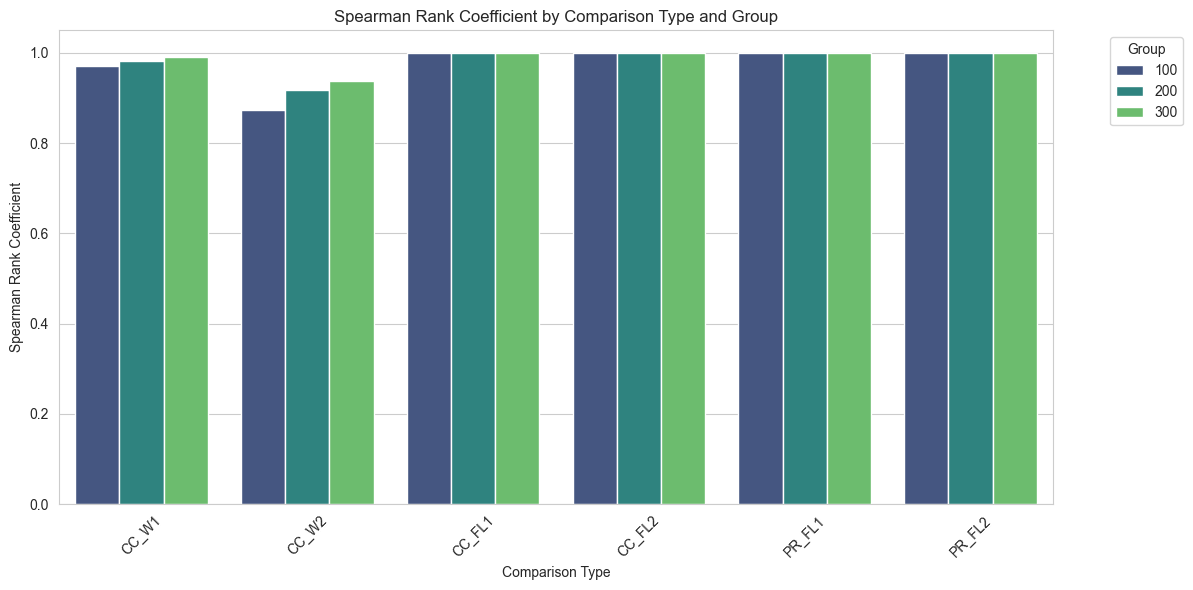

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming your DataFrame is named df
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
barplot = sns.barplot(data=df, x='comparison_type', y='spearman', hue='group', palette='viridis')

# Set the title and labels
plt.title('Spearman Rank Coefficient by Comparison Type and Group')
plt.xlabel('Comparison Type')
plt.ylabel('Spearman Rank Coefficient')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()

C:\Python310\lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.10980392156862745, 0.4980392156862745)) for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
C:\Python310\lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6941176470588235, 0.25098039215686274, 0.050980392156862744)) for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
C:\Python310\lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07058823529411765, 0.44313725490196076, 0.10980392156862745)) for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, la

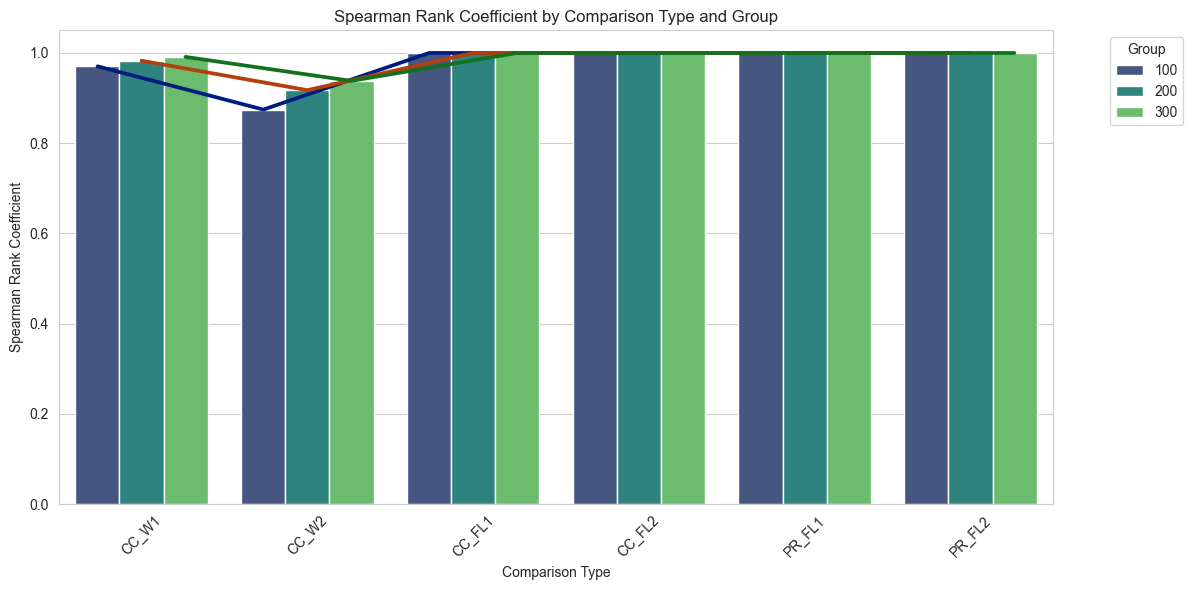

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
barplot = sns.barplot(data=df, x='comparison_type', y='spearman', hue='group', palette='viridis', ax=ax, dodge=True)

# Overlay a point plot to connect the respective bars of each group
# 'dodge' parameter ensures that the points are aligned with the corresponding bars
pointplot = sns.pointplot(data=df, x='comparison_type', y='spearman', hue='group', palette='dark', markers='', linestyles='-', dodge=0.53, ax=ax)

# Set the title and labels
ax.set_title('Spearman Rank Coefficient by Comparison Type and Group')
ax.set_xlabel('Comparison Type')
ax.set_ylabel('Spearman Rank Coefficient')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Handle the legend: we only want one legend, so we extract labels and handles from the pointplot and set them to the barplot
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[3:], labels[3:], title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()

---
---

### Jaccard Similarity Index

#### Anotation1

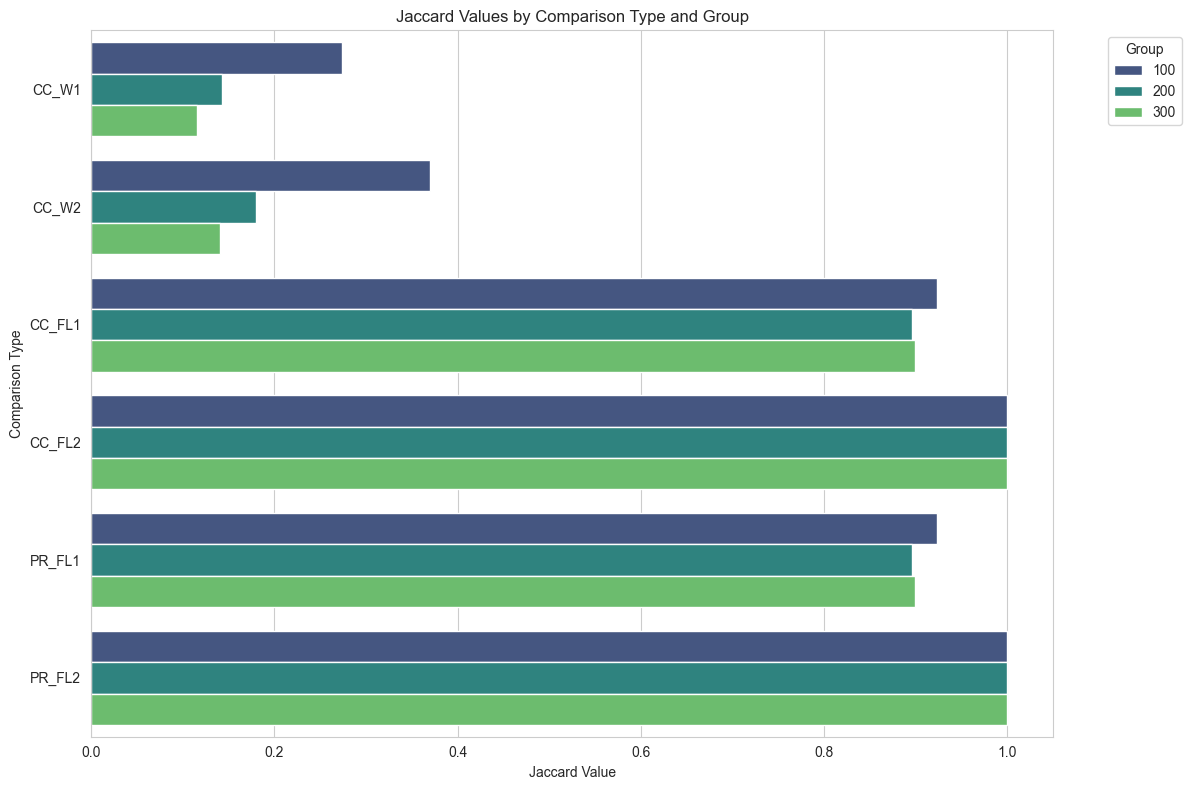

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust figure size as needed

# Create the horizontal bar plot
barplot = sns.barplot(data=df, y='comparison_type', x='jaccard', hue='group', palette='viridis', ax=ax)

# Set the title and labels
ax.set_title('Jaccard Values by Comparison Type and Group')
ax.set_ylabel('Comparison Type')
ax.set_xlabel('Jaccard Value')

# Display the legend
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()

#### Anotation 2

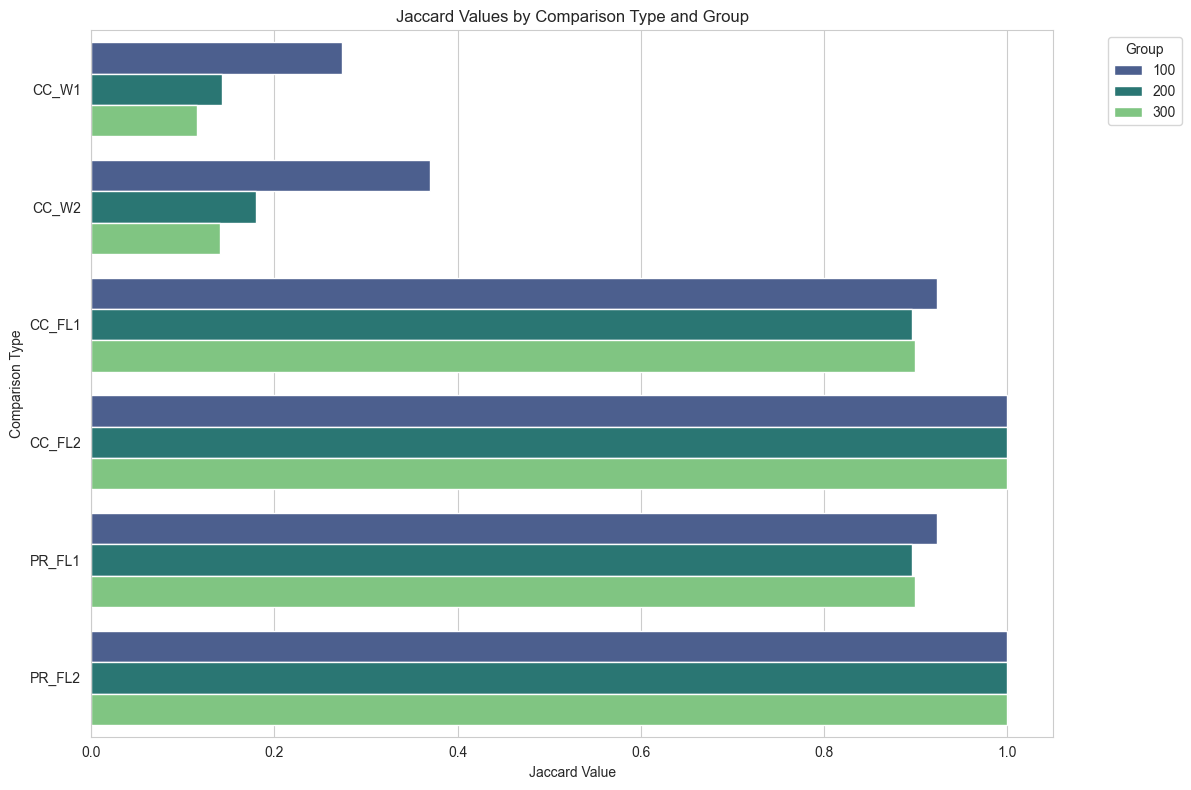

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Set the style of seaborn
sns.set_style("whitegrid")

# Define a custom color palette with slight variations in the 'viridis' color map
# Adjust the number of colors based on the number of groups in your dataset
palette = sns.color_palette("viridis", n_colors=df['group'].nunique())

# Darken and lighten the colors for differentiation
# Here, we're adjusting the luminance while keeping the hue and saturation constant
from colorsys import hls_to_rgb, rgb_to_hls

def adjust_color_lightness(color, amount=1.2):
    # Convert RGB to HLS
    c = rgb_to_hls(*color[:3])
    # Adjust lightness
    return hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

# Adjust each color in the palette
adjusted_palette = [adjust_color_lightness(color, amount=1.1 if i % 2 == 0 else 0.9) for i, color in enumerate(palette)]

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust figure size as needed

# Create the horizontal bar plot with the adjusted color palette
barplot = sns.barplot(data=df, y='comparison_type', x='jaccard', hue='group', palette=adjusted_palette, ax=ax)

# Set the title and labels
ax.set_title('Jaccard Values by Comparison Type and Group')
ax.set_ylabel('Comparison Type')
ax.set_xlabel('Jaccard Value')

# Display the legend
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()

#### Anotation 3

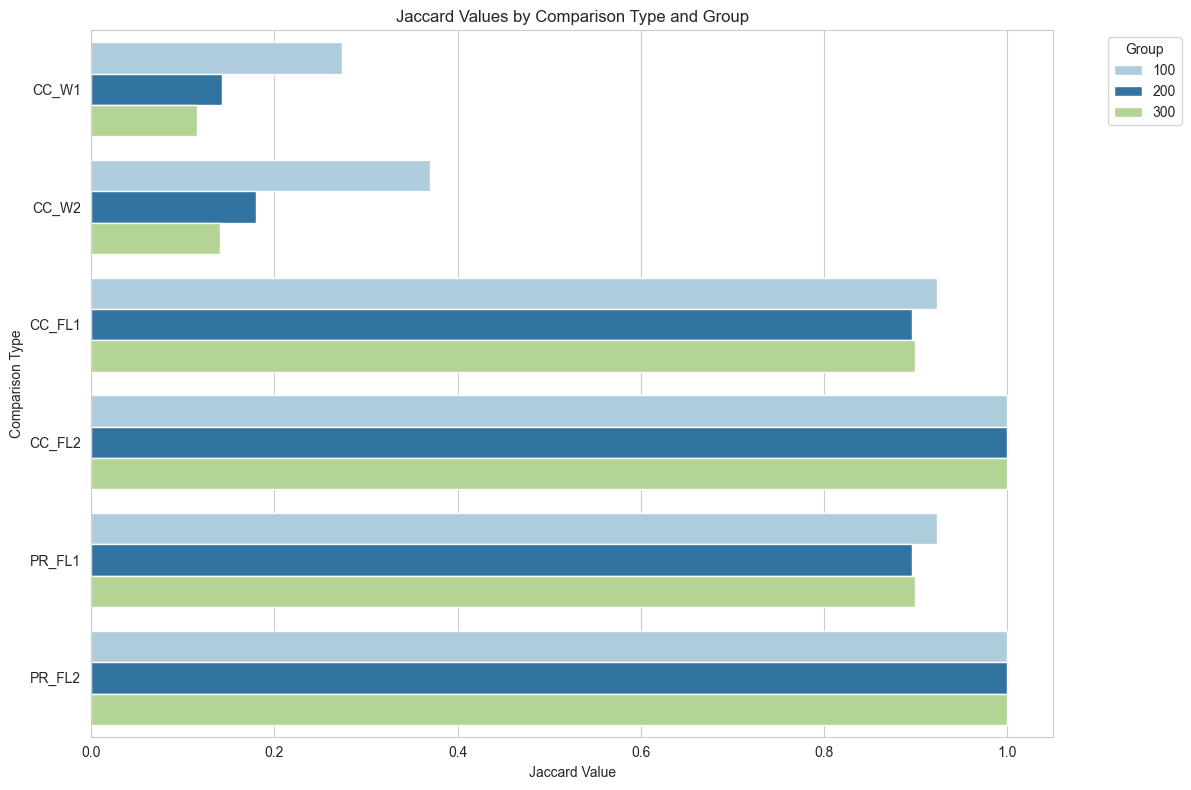

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Set the style of seaborn
sns.set_style("whitegrid")

# Define a color palette using 'Paired', adjusted for the number of groups
palette = sns.color_palette("Paired", n_colors=df['group'].nunique())

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust figure size as needed

# Create the horizontal bar plot with the 'Paired' color palette
barplot = sns.barplot(data=df, y='comparison_type', x='jaccard', hue='group', palette=palette, ax=ax)

# Set the title and labels
ax.set_title('Jaccard Values by Comparison Type and Group')
ax.set_ylabel('Comparison Type')
ax.set_xlabel('Jaccard Value')

# Display the legend
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()